In [131]:
# Import the necessary libraries
# Reference: https://scikit-learn.org/stable/
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, roc_curve,classification_report,confusion_matrix,precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn import svm,tree
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns


In [132]:
# Read thte dataset using pandas mutli dimensional dataframe
#https://drive.google.com/file/d/1Dz4DPxw6CkJW851vfc2Xxvo11IvUi2h2/view?usp=share_link
df= pd.read_csv('Occupancy_Estimation.csv')


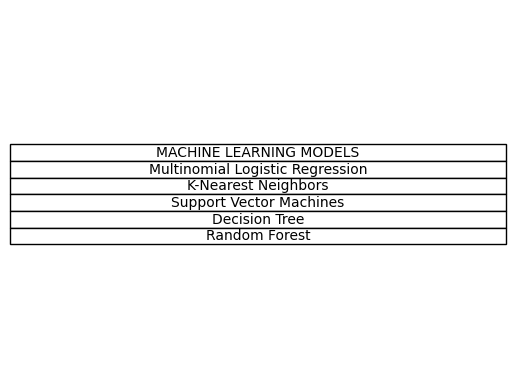

In [ ]:
Models = ['Multinomial Logistic Regression', 'K-Nearest Neighbors', 'Support Vector Machines', 'Decision Tree', 'Random Forest']
df_1 = pd.DataFrame({'MACHINE LEARNING MODELS': Models})
fig, ax = plt.subplots()
ax.axis('off')
ax.table(cellText=df_1.values, colLabels=df_1.columns, cellLoc='center',loc='center')
fig.savefig('mlmodel_table.png', dpi=300)


In [134]:
# Making sure if everything is working right!
df.head()

Date      Time  S1_Temp  S2_Temp  S3_Temp  S4_Temp  S1_Light  \
0  2017/12/22  10:49:41    24.94    24.75    24.56    25.38       121   
1  2017/12/22  10:50:12    24.94    24.75    24.56    25.44       121   
2  2017/12/22  10:50:42    25.00    24.75    24.50    25.44       121   
3  2017/12/22  10:51:13    25.00    24.75    24.56    25.44       121   
4  2017/12/22  10:51:44    25.00    24.75    24.56    25.44       121   

   S2_Light  S3_Light  S4_Light  S1_Sound  S2_Sound  S3_Sound  S4_Sound  \
0        34        53        40      0.08      0.19      0.06      0.06   
1        33        53        40      0.93      0.05      0.06      0.06   
2        34        53        40      0.43      0.11      0.08      0.06   
3        34        53        40      0.41      0.10      0.10      0.09   
4        34        54        40      0.18      0.06      0.06      0.06   

   S5_CO2  S5_CO2_Slope  S6_PIR  S7_PIR  Room_Occupancy_Count  
0     390      0.769231       0       0                     1  
1     390      0.646154       0       0                     1  
2     390      0.519231       0       0                     1  
3     390      0.388462       0       0                     1  
4     390      0.253846       0       0                     1

In [ ]:
import pandas as pd
import matplotlib
matplotlib.use('Agg')  # Set the Agg backend
# Generate table with describe() method
table = df.describe()

# Create figure and axis objects
fig, ax = plt.subplots()

# Hide axes and set table properties
ax.axis('off')
ax.axis('tight')
ax.table(cellText=table.values,
         colLabels=table.columns,
         cellLoc='center',
         loc='center',
         fontsize=14)  # Increase font size to 14

# Save the table as an image
plt.savefig('table.png', bbox_inches='tight')

In [ ]:

a= df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  10129 non-null  object 
 1   Time                  10129 non-null  object 
 2   S1_Temp               10129 non-null  float64
 3   S2_Temp               10129 non-null  float64
 4   S3_Temp               10129 non-null  float64
 5   S4_Temp               10129 non-null  float64
 6   S1_Light              10129 non-null  int64  
 7   S2_Light              10129 non-null  int64  
 8   S3_Light              10129 non-null  int64  
 9   S4_Light              10129 non-null  int64  
 10  S1_Sound              10129 non-null  float64
 11  S2_Sound              10129 non-null  float64
 12  S3_Sound              10129 non-null  float64
 13  S4_Sound              10129 non-null  float64
 14  S5_CO2                10129 non-null  int64  
 15  S5_CO2_Slope       

Text(0.5, 1.0, 'Room Occupancy instances')

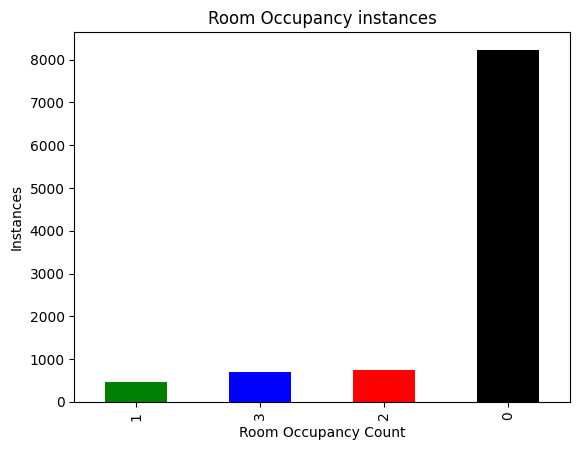

In [ ]:
# To count the number of people in the response variable ( Room_Occupancy_count)
number_of_people = df['Room_Occupancy_Count'].value_counts().sort_values()
number_of_people.plot( kind = 'bar', color = ['green','blue','red','black'])
plt.ylabel("Instances")
plt.xlabel("Room Occupancy Count")
plt.title("Room Occupancy instances")

#plt.savefig('r_v_conf.png')

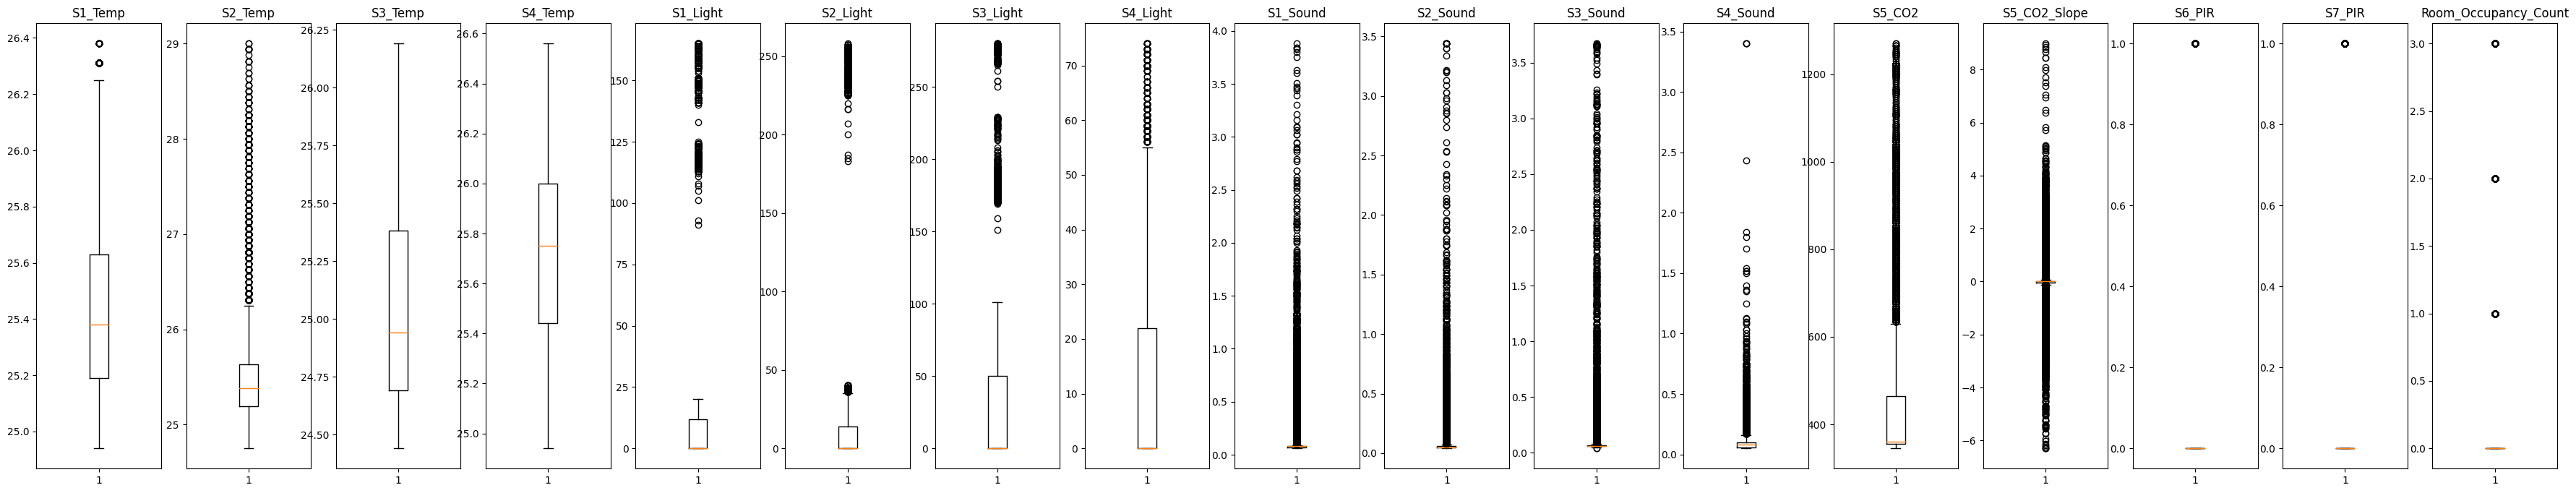

In [ ]:
variables= df.drop(columns= ['Date','Time'])
#print(variables)

figures, axes = plt.subplots(nrows = 1, ncols = len(variables.columns),figsize= (45,8))

for i , ip in enumerate(variables.columns):
    axes[i].boxplot(df[ip])
    axes[i].set_title(ip)
#Note: If the figures are displayed too small, please double click on the image plot to zoom in. 


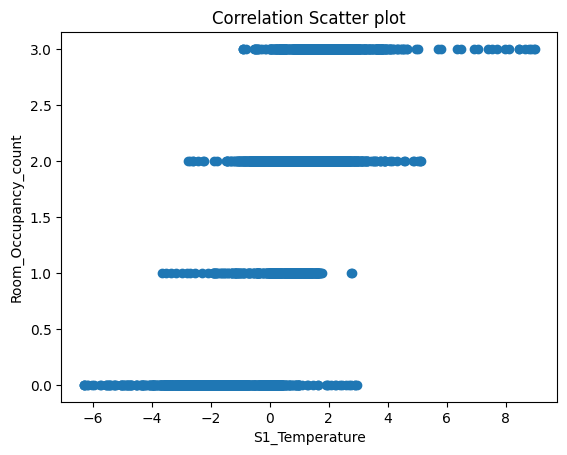

In [ ]:
plt.scatter(df['S5_CO2_Slope'], df['Room_Occupancy_Count'])
plt.xlabel('S1_Temperature')
plt.ylabel('Room_Occupancy_count')
plt.title('Correlation Scatter plot')
plt.show()

<ipython-input-8-a72aae4a5e28>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


<Axes: >

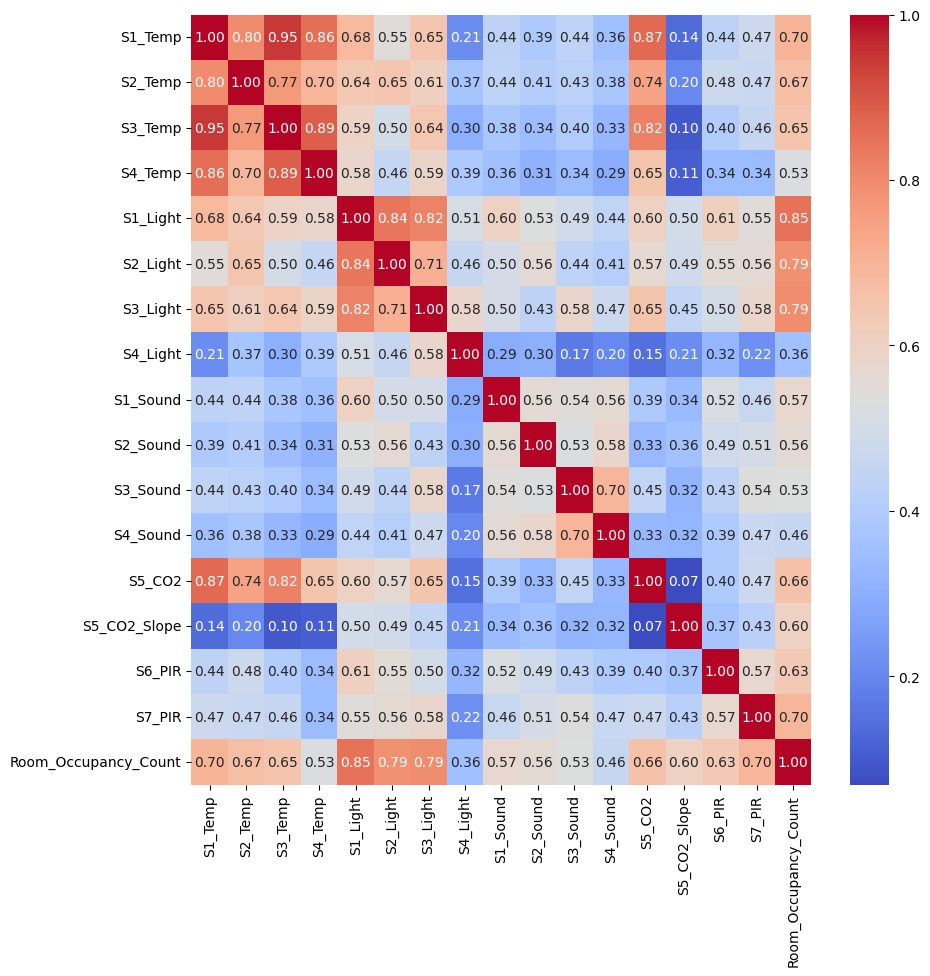

In [ ]:

plt.figure(figsize=(10,10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt='.2f')

#plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

<Axes: xlabel='S3_Light', ylabel='S3_Sound'>

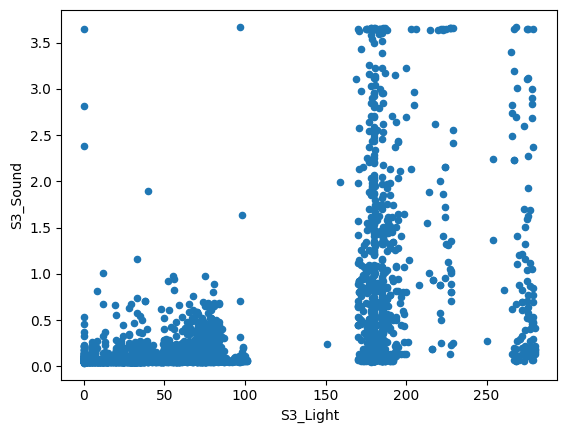

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
df.plot(kind = "scatter", x="S3_Light", y = "S3_Sound")

In [109]:
#Dividing the dataset into training and test set
X=df.iloc[:,2:18]
y=df.iloc[:,-1]
X_Train,X_Test,y_Train,y_Test = train_test_split(X,y,test_size=0.25, shuffle= True, random_state=0)
#Training set (75% data points)
#X_Train= 3-17 columns, y_Train= Room_Occupancy count column
print("Training set %% input features\n",X_Train)
print("Training set %% dependent variable\n",y_Train)

print("--------------------")

#Test set (25% data points)
#X_Test= 3-17 columns, Test = Room_Occupancy count column
print("Test set %% input features\n",X_Test)
print("Test set %% dependent variable\n",y_Test)


#sns.pairplot(X_Train)


Training set %% input features
       S1_Temp  S2_Temp  S3_Temp  S4_Temp  S1_Light  S2_Light  S3_Light  \
5417    25.06    25.06    24.69    25.56         9        10        44   
811     26.25    26.38    26.00    26.44       148       234       178   
1940    25.13    25.19    24.69    25.56         0         0         0   
4069    25.56    25.56    25.13    25.69         0         0         0   
5033    25.13    25.13    24.50    25.44         0         0         1   
...       ...      ...      ...      ...       ...       ...       ...   
9225    25.19    25.25    24.75    25.38         0         0         0   
4859    25.19    25.19    24.63    25.56         0         0         0   
3264    25.88    26.81    25.50    26.25       120        26        48   
9845    25.06    25.06    24.56    25.19         0         0         0   
2732    25.19    25.13    24.81    25.69        12        14        58   

      S4_Light  S1_Sound  S2_Sound  S3_Sound  S4_Sound  S5_CO2  S5_CO2_Slope  \

Step 1:

# We need to normalise all the feautres in order to avoid overfitting as all the classification models especially for Logistic regression.


In [110]:
#We use Min Max Scaler to normalise all the features
MMScaler= MinMaxScaler()
#Cols = ['S1_Temp', 'S1_Light','S1_Sound', 'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR']
#We fit the all the features to the training data set only, which leaves the test set unseen, although we did the fit only to the trianiing set  will scale the whole datset with that fit to scale consistently.
X_Tr_Scaled = MMScaler.fit_transform(X_Train)
#We Scale the input features of training and test set, default range is 0,1
X_Te_Scaled =MMScaler.transform(X_Test)

#Note: The column name are not preserved in the scaled data variable
print("####Scaled Training set data####")
print(X_Tr_Scaled[:5,:])
print("####Scaled test set data####")
print(X_Te_Scaled[:6:])


####Scaled Training set data####
[[0.08333333 0.07294118 0.14285714 0.38271605 0.05454545 0.03875969
  0.15714286 0.40540541 0.0026178  0.00294118 0.00276243 0.01492537
  0.01081081 0.41213494 0.         0.        ]
 [0.90972222 0.38352941 0.89142857 0.92592593 0.8969697  0.90697674
  0.63571429 0.13513514 0.03926702 0.35882353 0.0441989  0.02089552
  0.75135135 0.5835851  0.         1.        ]
 [0.13194444 0.10352941 0.14285714 0.38271605 0.         0.
  0.         0.         0.0052356  0.00588235 0.00276243 0.00298507
  0.01621622 0.41213494 0.         0.        ]
 [0.43055556 0.19058824 0.39428571 0.46296296 0.         0.
  0.         0.         0.0026178  0.         0.00276243 0.00298507
  0.06486486 0.31545821 0.         0.        ]
 [0.13194444 0.08941176 0.03428571 0.30864198 0.         0.
  0.00357143 0.01351351 0.0026178  0.00294118 0.00276243 0.00298507
  0.01081081 0.40609265 0.         0.        ]]
####Scaled test set data####
[[0.43055556 0.20705882 0.46285714 0.46296296 

Step 2: SAMPLING THE DATA

In [111]:
#Over Sampling our dataset as we have an imbalanced dataset
#!pip install --upgrade pip
#!pip install imblearn
#!python --version
from imblearn.over_sampling import SMOTE
O_Sampling = SMOTE(random_state=0)
X_Tr_Sampled, y_Tr_Sampled = O_Sampling.fit_resample(X_Train,y_Train)
X_Te_Sampled, y_Te_Sampled = O_Sampling.fit_resample(X_Test,y_Test)


Step 3: Developing the 
**Models:**
1.   Logistic Regression
2.   K-Nearest Neighbors
3.   Support Vector Machines
4.   Decision Trees
5.   Random Forest


        
        

MODEL. #1 Logistic Regression

In [ ]:
#Version 1
#Basic Logistic Regression
LR_obj= LogisticRegression(multi_class="multinomial",solver='lbfgs',max_iter=100)
#we need to fit the scaled data with the model with respect to training data set
LR_obj.fit(X_Train,y_Train)

response_predictor_Tr = LR_obj.predict(X_Train)
response_predictor_Te = LR_obj.predict(X_Test)

print("                  ------LR Model performance------")
print("Logistic regression Score for Training data", LR_obj.score(X_Train,y_Train))
print("Logistic regression Score for Test data", LR_obj.score(X_Test,y_Test))
print("                 #################For Test data#################")
print(classification_report(y_Test,response_predictor_Te,digits=3))

                  ------LR Model performance------
Logistic regression Score for Training data 0.9718272775144813
Logistic regression Score for Test data 0.9684168969601263
                 #################For Test data#################
              precision    recall  f1-score   support

           0      0.976     0.999     0.988      2060
           1      0.991     0.981     0.986       108
           2      0.966     0.887     0.925       195
           3      0.835     0.682     0.751       170

    accuracy                          0.968      2533
   macro avg      0.942     0.888     0.912      2533
weighted avg      0.967     0.968     0.967      2533



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Below is best performing Logistic Regression model of all .**

      !!!!!!!!!!!!!! ACCURACY SCORE : 0.983024082116068
                  ------LR Model performance------
Logistic regression Score for Training data 0.9870984728804634
Logistic regression Score for Test data 0.983024082116068
                 #################For Test data#################
              precision    recall  f1-score   support

           0      0.993     1.000     0.996      2060
           1      1.000     0.981     0.991       108
           2      0.966     0.887     0.925       195
           3      0.873     0.888     0.880       170

    accuracy                          0.983      2533
   macro avg      0.958     0.939     0.948      2533
weighted avg      0.983     0.983     0.983      2533

Confusion Matrix:
[[2060    0    0    0]
 [   0  106    2    0]
 [   0    0  173   22]
 [  15    0    4  151]]


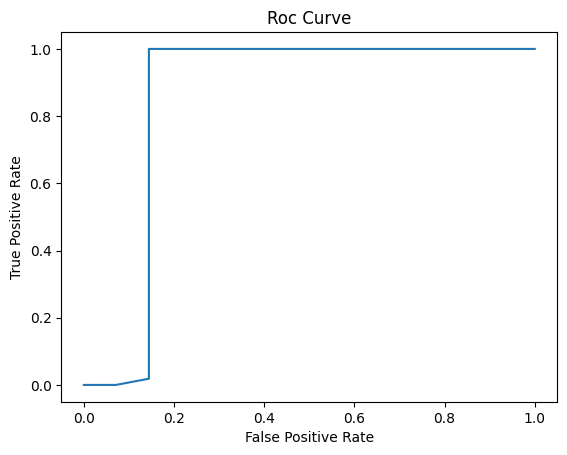

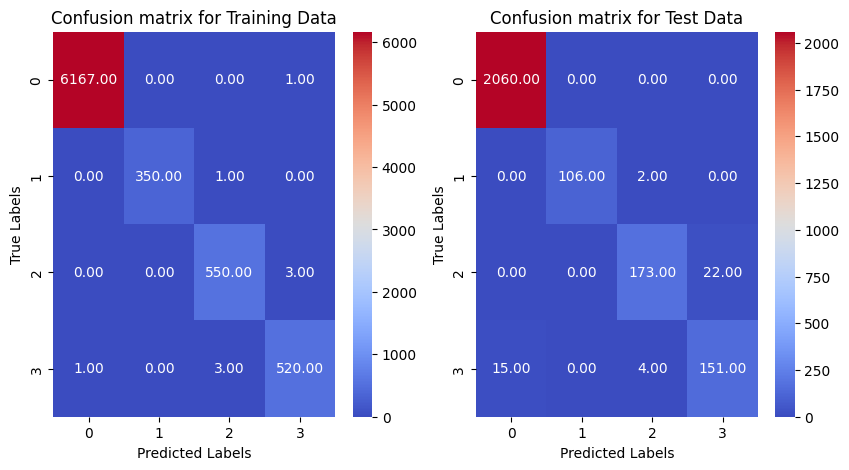

In [152]:
#Version2 Scaled -> LR
#With only Scaled data
LR_obj= LogisticRegression(multi_class="multinomial",solver='lbfgs',max_iter=1000)
#we need to fit the scaled data with the model with respect to training data set
LR_obj.fit(X_Tr_Scaled,y_Train)

response_predictor_Te = LR_obj.predict(X_Te_Scaled)

#Debugging
#print(response_predictor.shape)
#print(y_Test.shape)
#Accuracy of the model
Acc= accuracy_score(y_Test,response_predictor_Te)
print(f"      !!!!!!!!!!!!!! ACCURACY SCORE : {Acc}")

print("                  ------LR Model performance------")
c_m= confusion_matrix(y_Test,response_predictor_Te)
print("Logistic regression Score for Training data", LR_obj.score(X_Tr_Scaled,y_Train))
print("Logistic regression Score for Test data", LR_obj.score(X_Te_Scaled,y_Test))
#printing the  metrics of the model
print("                 #################For Test data#################")
print(classification_report(y_Test,response_predictor_Te, digits = 3))
C_R =classification_report(y_Test,response_predictor_Te,digits = 3,output_dict=True)
#print(C_R)
lr_file = pd.DataFrame(C_R).transpose()
# Save the classication report into a CSV file
lr_file.to_csv('LR_CR.csv', float_format='%.3f')

print(f"Confusion Matrix:\n{c_m}")
FP,TP, Tld = roc_curve(y_Test,response_predictor_Te, pos_label =1)
plt.title('Roc Curve')
plt.plot(FP,TP)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.savefig('roc_curve_v2.png')

plt.show()

#Confusion Matrix for a better Visualisation
c_m_tr= confusion_matrix(y_Train,response_predictor_Tr)
c_m_te= confusion_matrix(y_Test,response_predictor_Te)

Figure, axes= plt.subplots(ncols=2, figsize= (10,5))

sns.heatmap(c_m_tr, cmap='coolwarm',annot=True,fmt='.2f', ax= axes[0])
axes[0].set_title('Confusion matrix for Training Data')
axes[0].set_xlabel('Predicted Labels') 
axes[0].set_ylabel('True Labels')


sns.heatmap(c_m_te, cmap='coolwarm',annot=True,fmt='.2f',  ax= axes[1])
axes[1].set_title('Confusion matrix for Test Data')
axes[1].set_xlabel('Predicted Labels') 
axes[1].set_ylabel('True Labels')
plt.savefig('heatmap_lr_v2.png')
plt.show()

                  ------LR Model performance------
Logistic regression Score for Training data 0.9711690363349131
Logistic regression Score for Test data 0.9628898539281484
                 #################For Training data#################
              precision    recall  f1-score   support

           0      0.990     1.000     0.995      6168
           1      0.886     0.994     0.937       351
           2      0.955     0.761     0.847       553
           3      0.832     0.842     0.837       524

    accuracy                          0.971      7596
   macro avg      0.916     0.899     0.904      7596
weighted avg      0.971     0.971     0.970      7596



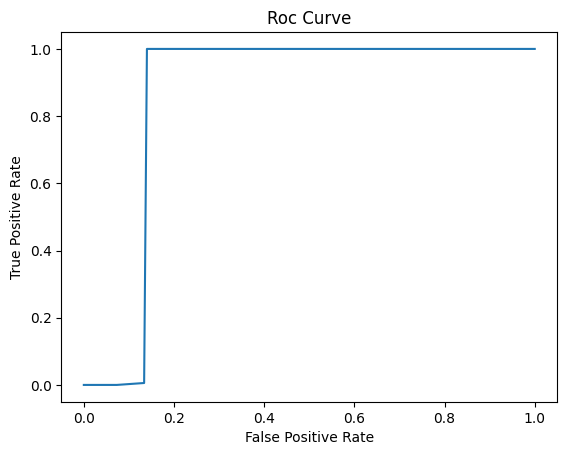

                 #################For Test data#################
              precision    recall  f1-score   support

           0      0.987     1.000     0.993      2060
           1      0.791     0.981     0.876       108
           2      0.951     0.697     0.805       195
           3      0.815     0.806     0.811       170

    accuracy                          0.963      2533
   macro avg      0.886     0.871     0.871      2533
weighted avg      0.964     0.963     0.961      2533



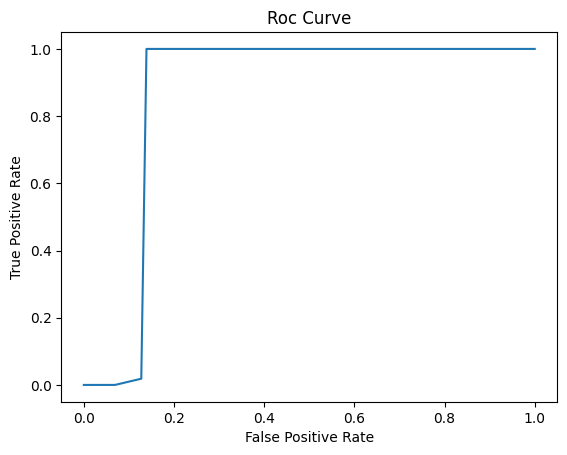

Text(518.4494949494949, 0.5, 'True Labels')

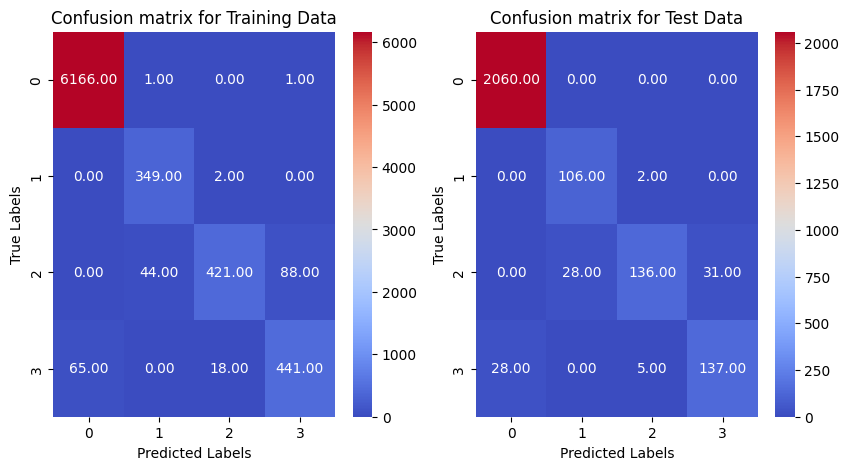

In [ ]:
#Version 3
# LR, with SCALED -> RIDGE -> LR

Ridge_reg = RidgeClassifier(alpha=0.1)
Ridge_reg.fit(X_Tr_Scaled, y_Train)
X_Tr_Ridge= Ridge_reg.predict(X_Tr_Scaled)
X_Te_Ridge= Ridge_reg.predict(X_Te_Scaled)
LR_obj= LogisticRegression(multi_class="multinomial",solver='lbfgs',max_iter=1000)
#we need to fit the scaled data with the model with respect to training data set
LR_obj.fit(X_Tr_Ridge.reshape(-1,1),y_Train)

response_predictor_Tr = LR_obj.predict(X_Tr_Ridge.reshape(-1,1))
response_predictor_Te = LR_obj.predict(X_Te_Ridge.reshape(-1,1))

#Debugging
#print(response_predictor.shape)
#print(y_Test.shape)

print("                  ------LR Model performance------")

print("Logistic regression Score for Training data", LR_obj.score(X_Tr_Ridge.reshape(-1,1),y_Train))
print("Logistic regression Score for Test data", LR_obj.score(X_Te_Ridge.reshape(-1,1),y_Test))

#printing the  metrics of the model

#just to know if the data is overfitting
print("                 #################For Training data#################")
print(classification_report(y_Train,response_predictor_Tr,digits=3))
#print(f"Confusion Matrix:\n{c_m_tr}")
FP,TP,Tld = roc_curve(y_Train,response_predictor_Tr, pos_label =1)
plt.title('Roc Curve')
plt.plot(FP,TP)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

#printing the  metrics of the model
print("                 #################For Test data#################")
print(classification_report(y_Test,response_predictor_Te,digits=3))
#lr_file = pd.DataFrame(report).transpose()

C_R =classification_report(y_Test,response_predictor_Te,digits = 3,output_dict=True)
#print(C_R)
lr_file = pd.DataFrame(C_R).transpose()
# Save the classication report into a CSV file
lr_file.to_csv('LR_CR.csv', float_format='%.3f')

FP,TP, Tld = roc_curve(y_Test,response_predictor_Te, pos_label =1)
plt.title('Roc Curve')
plt.plot(FP,TP)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.savefig('roc_curve_v3.png')
plt.show()



#Confusion Matrix for a better Visualisation
c_m_tr= confusion_matrix(y_Train,response_predictor_Tr)
c_m_te= confusion_matrix(y_Test,response_predictor_Te)
Figure, axes= plt.subplots(ncols=2, figsize= (10,5))

sns.heatmap(c_m_tr, cmap='coolwarm',annot=True,fmt='.2f', ax= axes[0])
axes[0].set_title('Confusion matrix for Training Data')
axes[0].set_xlabel('Predicted Labels') 
axes[0].set_ylabel('True Labels')

sns.heatmap(c_m_te, cmap='coolwarm',annot=True,fmt='.2f',  ax= axes[1])
axes[1].set_title('Confusion matrix for Test Data')
axes[1].set_xlabel('Predicted Labels') 
axes[1].set_ylabel('True Labels')

                  ------LR Model performance------
###For Training data##
              precision    recall  f1-score   support

           0      0.996     0.997     0.996      6168
           1      0.888     0.998     0.940      6168
           2      0.944     0.717     0.815      6168
           3      0.857     0.955     0.903      6168

    accuracy                          0.917     24672
   macro avg      0.921     0.917     0.914     24672
weighted avg      0.921     0.917     0.914     24672

 #####For Test Data####
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2060
           1       0.85      1.00      0.92      2060
           2       0.94      0.65      0.77      2060
           3       0.85      0.93      0.89      2060

    accuracy                           0.90      8240
   macro avg       0.90      0.90      0.89      8240
weighted avg       0.90      0.90      0.89      8240



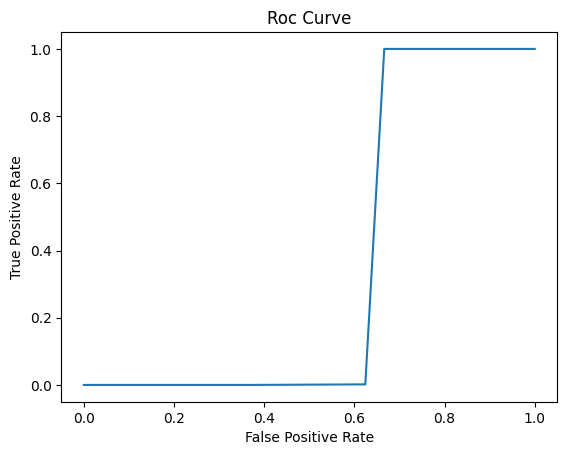

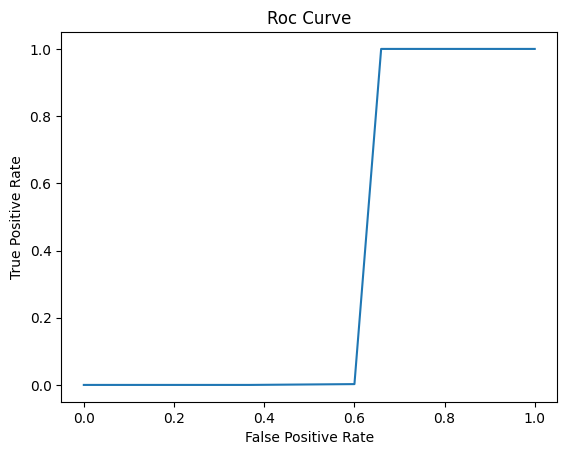

Text(518.4494949494949, 0.5, 'True Labels')

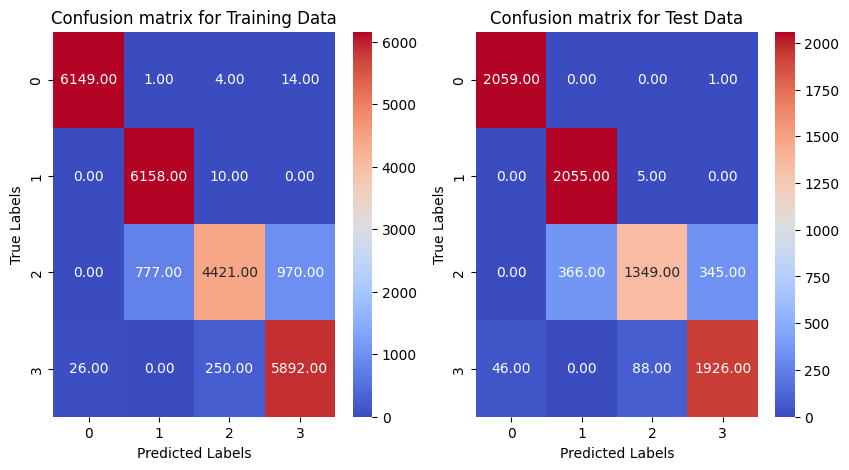

In [ ]:
#Version 4
# Over_sampling -> Ridge -> LR
#With Over_Sampled data

Ridge_reg = RidgeClassifier(alpha=0.1)
Ridge_reg.fit(X_Tr_Sampled, y_Tr_Sampled)
X_Tr_Ridge= Ridge_reg.predict(X_Tr_Sampled)
X_Te_Ridge= Ridge_reg.predict(X_Te_Sampled)

#As our Response variable(Room_Occupancy_count) is Multiclass.....0,1,2,3; Hence we use  multinomial logistic regression with solver for our medium sized dataset
#Our model fails to converge if we use default iterations, hence we used 1000 iterations.
LR_obj= LogisticRegression(multi_class="multinomial",solver='lbfgs',max_iter=1000)
#For Oversampled_data to fit our model
LR_obj.fit(X_Tr_Ridge.reshape(-1,1),y_Tr_Sampled)
response_predictor_Tr = LR_obj.predict(X_Tr_Ridge.reshape(-1,1))
response_predictor_Te = LR_obj.predict(X_Te_Ridge.reshape(-1,1))


# Metrics of the model
print("                  ------LR Model performance------")
print("###For Training data##")
print(classification_report(y_Tr_Sampled,response_predictor_Tr,digits=3))

#print(f"Confusion Matrix:\n{c_m}\n This model with oversmapled data has better outcome")

#
# Metrics of the model

print(" #####For Test Data####")
print(classification_report(y_Te_Sampled,response_predictor_Te))

#print(f"Confusion Matrix:\n{c_m}\n This model with oversmapled data has better outcome")
#sns.heatmap(c_m, cmap='coolwarm', annot=True, fmt='.2f')
#Displaying the Roc Curve
FP,TP, Tld = roc_curve(y_Tr_Sampled,response_predictor_Tr, pos_label =1)

plt.title('Roc Curve')
plt.plot(FP,TP)
#plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

# Download the file
C_R =classification_report(y_Te_Sampled,response_predictor_Te,digits = 3,output_dict=True)
#print(C_R)
lr_file = pd.DataFrame(C_R).transpose()
# Save the classication report into a CSV file
lr_file.to_csv('LR_CR_v4_test.csv', float_format='%.3f')
# Download the file
C_R =classification_report(y_Tr_Sampled,response_predictor_Tr,digits = 3,output_dict=True)
#print(C_R)
lr_file = pd.DataFrame(C_R).transpose()
# Save the classication report into a CSV file
lr_file.to_csv('LR_CR_v4_train.csv', float_format='%.3f')
#Displaying the Roc Curve
FP,TP, Tld = roc_curve(y_Te_Sampled,response_predictor_Te, pos_label =1)

plt.title('Roc Curve')
plt.plot(FP,TP)
#plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.savefig('roc_curve_v3.png')
plt.show()

#Confusion Matrix for a better Visualisation
c_m_tr= confusion_matrix(y_Tr_Sampled,response_predictor_Tr)
c_m_te= confusion_matrix(y_Te_Sampled,response_predictor_Te)
Figure, axes= plt.subplots(ncols=2, figsize= (10,5))

sns.heatmap(c_m_tr, cmap='coolwarm',annot=True,fmt='.2f', ax= axes[0])
axes[0].set_title('Confusion matrix for Training Data')
axes[0].set_xlabel('Predicted Labels') 
axes[0].set_ylabel('True Labels')

sns.heatmap(c_m_te, cmap='coolwarm',annot=True,fmt='.2f',  ax= axes[1])
axes[1].set_title('Confusion matrix for Test Data')
axes[1].set_xlabel('Predicted Labels') 
axes[1].set_ylabel('True Labels')

MODEL #2, K-Nearest Neighbor


**Below is best performing KNN model of all .**

      !!!!!!!!!!!!!! ACCURACY SCORE : 0.9948677457560205
    *****************KNN Model's Performance***************** 
            -------------With Scaled data-------------
                    #####For Test data#####
               precision    recall  f1-score   support

           0      1.000     1.000     1.000      2060
           1      0.991     0.981     0.986       108
           2      0.969     0.964     0.967       195
           3      0.965     0.976     0.971       170

    accuracy                          0.995      2533
   macro avg      0.981     0.981     0.981      2533
weighted avg      0.995     0.995     0.995      2533



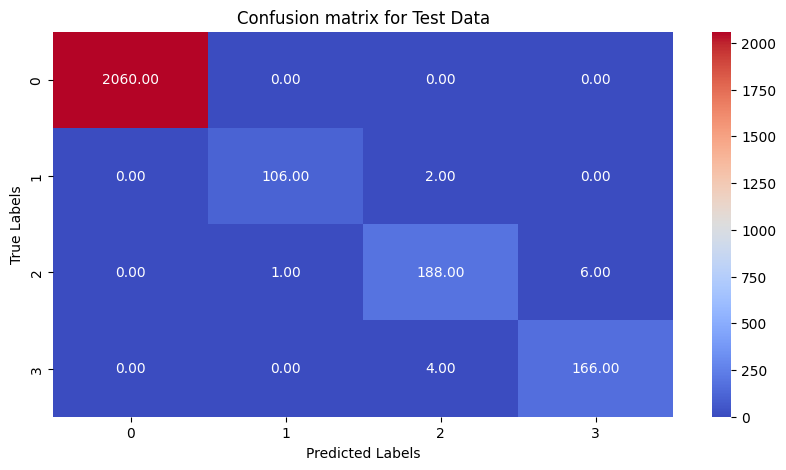

In [154]:
#Version1
#KNN
KNN_obj= KNeighborsClassifier(n_neighbors=5,n_jobs=5)
# we will fit the model with scaled data
KNN_obj.fit(X_Train, y_Train)
#Predicting the response variable
response_predictor_Te = KNN_obj.predict(X_Test)

#Accuracy of the model
Acc= accuracy_score(y_Test,response_predictor_Te)
print(f"      !!!!!!!!!!!!!! ACCURACY SCORE : {Acc}")

#KNN model performance with test data
print("    *****************KNN Model's Performance***************** \n            -------------With Scaled data-------------\n                    #####For Test data#####\n",classification_report(y_Test,response_predictor_Te,digits =3))

Figure, axes= plt.subplots(figsize= (10,5))
c_m_2 = confusion_matrix(y_Test, response_predictor_Te)
sns.heatmap(c_m_2, cmap='coolwarm',annot=True,fmt='.2f',  ax= axes)
axes.set_title('Confusion matrix for Test Data')
axes.set_xlabel('Predicted Labels') 
axes.set_ylabel('True Labels')
plt.savefig('heatmap_knn_v1.png')
plt.show()

C_R =classification_report(y_Test,response_predictor_Te,digits = 3,output_dict=True)
#print(C_R)
lr_file = pd.DataFrame(C_R).transpose()
# Save the classication report into a CSV file
lr_file.to_csv('knn_CR_best_v1.csv', float_format='%.3f')


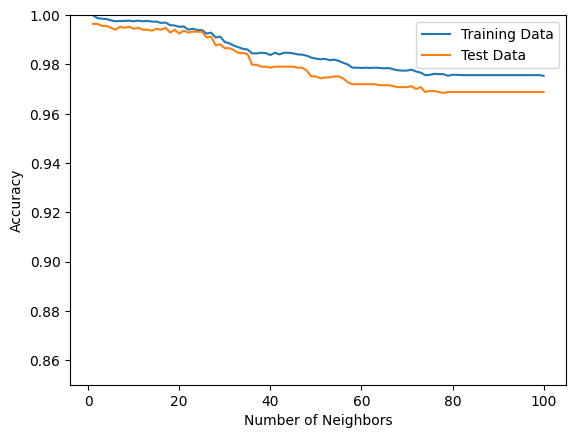

In [138]:
n_neighbors = range(1, 101)
Te_Acc=[]
Tr_Acc=[]
for n in n_neighbors:
  KNN_obj = KNeighborsClassifier(n_neighbors=n,n_jobs=5) 
  KNN_obj.fit(X_Train, y_Train)
  Tr_Acc.append(KNN_obj.score(X_Train, y_Train))
  Te_Acc.append(KNN_obj.score(X_Test, y_Test))


plt.plot(n_neighbors, Tr_Acc, label="Training Data")
plt.plot(n_neighbors, Te_Acc, label="Test Data")
plt.ylabel("Accuracy")
plt.xlabel("Number of Neighbors")
plt.ylim([0.85, 1.0])
plt.legend()
plt.savefig('KNN_performance_graph.png')
plt.show()

      !!!!!!!!!!!!!! ACCURACY SCORE : 0.9198578760363205
Cv score0.924198766673683
    *****************KNN Model's Performance***************** 
            -------------With Scaled data-------------
                    #####For Training data#####
               precision    recall  f1-score   support

           0      0.972     0.992     0.982      6168
           1      0.744     0.587     0.656       351
           2      0.792     0.832     0.811       553
           3      0.798     0.677     0.733       524

    accuracy                          0.940      7596
   macro avg      0.826     0.772     0.795      7596
weighted avg      0.936     0.940     0.937      7596

    *****************KNN Model's Performance***************** 
            -------------With Scaled data-------------
                    #####For Test data#####
               precision    recall  f1-score   support

           0      0.968     0.988     0.978      2060
           1      0.569     0.537     0.552

Text(518.4494949494949, 0.5, 'True Labels')

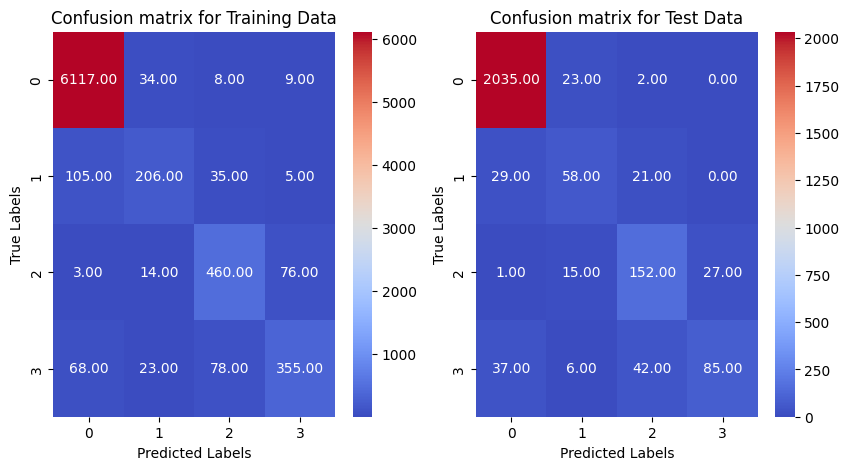

In [ ]:
#Version 2
#Scaled -> PCA -> LASSO -> KNN
# Using 5 fold KNN
#PCA applied for Scaled data

#With n_components = 12, the precision and recall are less so we took 10.
P_C_A = PCA(n_components=10)
P_C_A.fit(X_Tr_Scaled)
X_Tr_Revised = P_C_A.transform(X_Tr_Scaled)
X_Te_Revised = P_C_A.transform(X_Te_Scaled)

#Lasso L1
L1_reg = Lasso(alpha=0.1)
L1_reg.fit(X_Tr_Revised, y_Train)
X_Tr_Lasso= L1_reg.predict(X_Tr_Revised)
X_Te_Lasso= L1_reg.predict(X_Te_Revised)

#KNN
KNN_obj= KNeighborsClassifier(n_neighbors=5)
# we will fit the model with scaled data
KNN_obj.fit(X_Tr_Lasso.reshape(-1,1), y_Train)
#Predicting the response variable
#response_predictor = KNN_obj.predict(X_Te_Scaled)
response_predictor_Tr = KNN_obj.predict(X_Tr_Lasso.reshape(-1,1))
response_predictor_Te = KNN_obj.predict(X_Te_Lasso.reshape(-1,1))

#Accuracy of the model
Acc= accuracy_score(y_Test,response_predictor_Te)
print(f"      !!!!!!!!!!!!!! ACCURACY SCORE : {Acc}")
#Cross validation Score to determine which knn model would perform better, this case k=5, as k=3 has cv score of 0.912
cv_score= cross_val_score(KNN_obj,X_Te_Lasso.reshape(-1,1),y_Test, cv = 5 )
Mean_s = cv_score.mean()
print(f"Cv score{Mean_s}")

#Evaluating the model's performance
print("    *****************KNN Model's Performance***************** \n            -------------With Scaled data-------------\n                    #####For Training data#####\n",classification_report(y_Train,response_predictor_Tr,digits=3))
#print("----For Training data----")
Figure, axes= plt.subplots(ncols=2, figsize= (10,5))
c_m_1 = confusion_matrix(y_Train, response_predictor_Tr)
sns.heatmap(c_m_1, cmap='coolwarm',annot=True,fmt='.2f', ax= axes[0])
axes[0].set_title('Confusion matrix for Training Data')
axes[0].set_xlabel('Predicted Labels') 
axes[0].set_ylabel('True Labels')

C_R =classification_report(y_Test,response_predictor_Te,digits = 3,output_dict=True)
#print(C_R)
lr_file = pd.DataFrame(C_R).transpose()
# Save the classication report into a CSV file
lr_file.to_csv('KNN_CR.csv', float_format='%.3f')

print("    *****************KNN Model's Performance***************** \n            -------------With Scaled data-------------\n                    #####For Test data#####\n",classification_report(y_Test,response_predictor_Te,digits =3))

c_m_2 = confusion_matrix(y_Test, response_predictor_Te)
sns.heatmap(c_m_2, cmap='coolwarm',annot=True,fmt='.2f',  ax= axes[1])
axes[1].set_title('Confusion matrix for Test Data')
axes[1].set_xlabel('Predicted Labels') 
axes[1].set_ylabel('True Labels')



As the k value increase the model is oversmoothing and its increasing the bias.

Cv score0.8311893203883496
    *****************KNN Model's Performance***************** 
            -------------With Sampled data-------------
               precision    recall  f1-score   support

           0      0.916     0.947     0.931      6168
           1      0.881     0.909     0.895      6168
           2      0.886     0.893     0.890      6168
           3      0.882     0.817     0.848      6168

    accuracy                          0.891     24672
   macro avg      0.891     0.891     0.891     24672
weighted avg      0.891     0.891     0.891     24672

    *****************KNN Model's Performance***************** 
            -------------With Sampled data-------------
               precision    recall  f1-score   support

           0      0.872     0.938     0.904      2060
           1      0.807     0.850     0.828      2060
           2      0.819     0.834     0.827      2060
           3      0.800     0.682     0.736      2060

    accuracy              

Text(518.4494949494949, 0.5, 'True Labels')

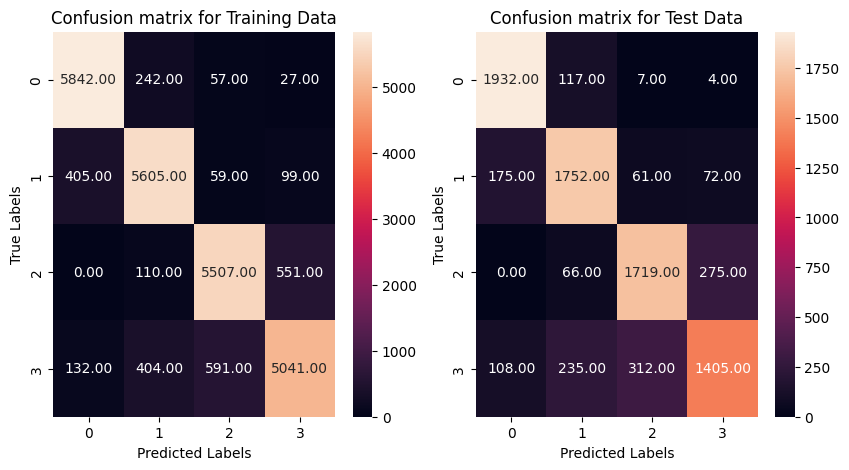

In [ ]:
#version 3
# Sampled -> PCA -> LASSO -> KNN
#NOT SO GOOD MODEL 
# Using 5 fold KNN
#Using Over_Sampling
#PCA applied for Sampled data
P_C_A = PCA(n_components=10)
P_C_A.fit(X_Tr_Sampled)
X_Tr_Revised = P_C_A.transform(X_Tr_Sampled)
X_Te_Revised = P_C_A.transform(X_Te_Sampled)

#Lasso L1
L1_reg = Lasso(alpha=0.1)
L1_reg.fit(X_Tr_Revised, y_Tr_Sampled)
X_Tr_Lasso= L1_reg.predict(X_Tr_Revised)
X_Te_Lasso= L1_reg.predict(X_Te_Revised)
KNN_obj= KNeighborsClassifier(n_neighbors=5)
# we will fit the model with scaled data
KNN_obj.fit(X_Tr_Lasso.reshape(-1,1), y_Tr_Sampled)
#Predicting the response variable
#Cross validation Score to determine which knn model would perform better, this case k=5, as k=3 has cv score of 0.912
cv_score= cross_val_score(KNN_obj,X_Te_Lasso.reshape(-1,1),y_Te_Sampled, cv = 5 )
Mean_s = cv_score.mean()
print(f"Cv score{Mean_s}")
#response_predictor = KNN_obj.predict(X_Te_Sampled)
response_predictor_Tr = KNN_obj.predict(X_Tr_Lasso.reshape(-1,1))
response_predictor_Te = KNN_obj.predict(X_Te_Lasso.reshape(-1,1))
#Evaluating the model's performance
#print("    *****************KNN Model's Performance***************** \n            -------------With Sampled data-------------\n",classification_report(y_Te_Sampled,response_predictor))
print("    *****************KNN Model's Performance***************** \n            -------------With Sampled data-------------\n",classification_report(y_Tr_Sampled,response_predictor_Tr,digits=3))

print("    *****************KNN Model's Performance***************** \n            -------------With Sampled data-------------\n",classification_report(y_Te_Sampled,response_predictor_Te,digits=3))
Figure, axes= plt.subplots(ncols=2, figsize= (10,5))
c_m_1 = confusion_matrix(y_Tr_Sampled, response_predictor_Tr)
sns.heatmap(c_m_1,annot=True,fmt='.2f', ax= axes[0])
axes[0].set_title('Confusion matrix for Training Data')
axes[0].set_xlabel('Predicted Labels') 
axes[0].set_ylabel('True Labels')


c_m_2 = confusion_matrix(y_Te_Sampled, response_predictor_Te)
sns.heatmap(c_m_2,annot=True,fmt='.2f',  ax= axes[1])
axes[1].set_title('Confusion matrix for Test Data')
axes[1].set_xlabel('Predicted Labels') 
axes[1].set_ylabel('True Labels')


MODEL #3 SVM

In [122]:
#SVM
SVM_obj = svm.SVC(kernel = 'sigmoid', C=1, random_state=0)
SVM_obj.fit(X_Train,y_Train)

response_predictor_Tr = SVM_obj.predict(X_Train)
response_predictor_Te = SVM_obj.predict(X_Test)
#Evaluating the model's performance

#Accuracy of the model
Acc= accuracy_score(y_Test,response_predictor_Te)
print(f"      !!!!!!!!!!!!!! ACCURACY SCORE : {Acc}")


      !!!!!!!!!!!!!! ACCURACY SCORE : 0.8176075799447295


Cv score0.936433800313399
CV score Standard deviation: 0.0065861055474202845
      !!!!!!!!!!!!!! ACCURACY SCORE : 0.9470983024082116
    *****************SVM Model's Performance***************** 
            -------------With Training data-------------
               precision    recall  f1-score   support

           0      0.993     0.999     0.996      6168
           1      0.940     0.983     0.961       351
           2      0.763     0.553     0.642       553
           3      0.625     0.748     0.681       524

    accuracy                          0.948      7596
   macro avg      0.830     0.821     0.820      7596
weighted avg      0.949     0.948     0.947      7596

----For Training data----
    *****************SVM Model's Performance***************** 
            -------------With Test data-------------
               precision    recall  f1-score   support

           0      0.991     0.999     0.995      2060
           1      0.946     0.972     0.959       108
    

Text(518.4494949494949, 0.5, 'True Labels')

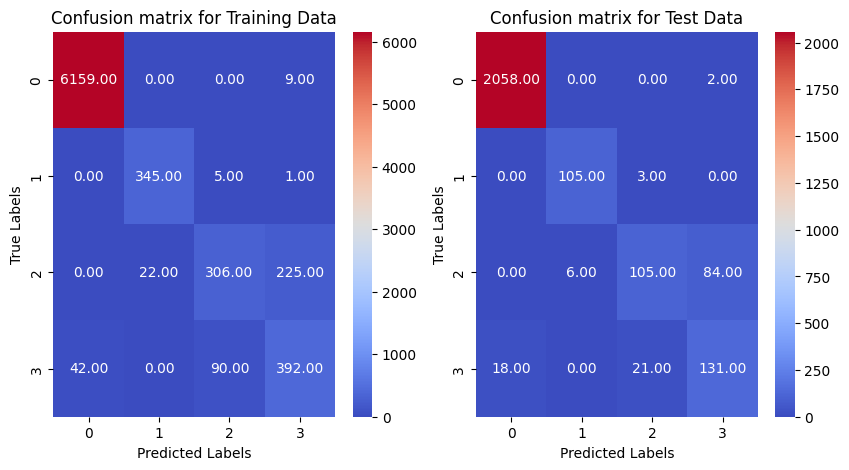

In [ ]:
# Feature Selection generated data -> PCA -> SVM
#Defining the SVM model with usual data

Cols = ['S1_Temp', 'S1_Light','S1_Sound', 'S5_CO2', 'S6_PIR','S7_PIR']
P_C_A = PCA(n_components=5)
P_C_A.fit(X_Train[Cols])
X_Tr_Revised = P_C_A.transform(X_Train[Cols])
X_Te_Revised = P_C_A.transform(X_Test[Cols])

SVM_obj = svm.SVC(kernel = 'linear', C=1, random_state=0, decision_function_shape='ovo')
SVM_obj.fit(X_Tr_Revised,y_Train)

response_predictor_Tr = SVM_obj.predict(X_Tr_Revised)
response_predictor_Te = SVM_obj.predict(X_Te_Revised)

#Cross validation Score to determine which knn model would perform better
cv_score= cross_val_score(SVM_obj, X_Te_Revised, y_Test, cv = 5 )
Mean_s = cv_score.mean()
print(f"Cv score{Mean_s}")
std_s =cv_score.std()
print(f"CV score Standard deviation: {std_s}")

#Evaluating the model's performance

#Accuracy of the model
Acc= accuracy_score(y_Test,response_predictor_Te)
print(f"      !!!!!!!!!!!!!! ACCURACY SCORE : {Acc}")

print("    *****************SVM Model's Performance***************** \n            -------------With Training data-------------\n",classification_report(y_Train,response_predictor_Tr,digits=3))
print("----For Training data----")
Figure, axes= plt.subplots(ncols=2, figsize= (10,5))
c_m_1 = confusion_matrix(y_Train, response_predictor_Tr)
sns.heatmap(c_m_1, cmap='coolwarm',annot=True,fmt='.2f', ax= axes[0])
axes[0].set_title('Confusion matrix for Training Data')
axes[0].set_xlabel('Predicted Labels') 
axes[0].set_ylabel('True Labels')
print("    *****************SVM Model's Performance***************** \n            -------------With Test data-------------\n",classification_report(y_Test,response_predictor_Te,digits=3))
c_m_2 = confusion_matrix(y_Test, response_predictor_Te)
sns.heatmap(c_m_2, cmap='coolwarm',annot=True,fmt='.2f',  ax= axes[1])
axes[1].set_title('Confusion matrix for Test Data')
axes[1].set_xlabel('Predicted Labels') 
axes[1].set_ylabel('True Labels')



**Below is best performing Support Vector Machine model of all .**

Cv score0.9538134106695979
CV score Standard deviation: 0.009533123993971736
      !!!!!!!!!!!!!! ACCURACY SCORE : 0.9818397157520726
    *****************SVM Model's Performance***************** 
            -------------With Scaled data-------------
               precision    recall  f1-score   support

           0      0.993     0.998     0.996      6168
           1      0.997     0.997     0.997       351
           2      0.996     0.901     0.946       553
           3      0.883     0.918     0.900       524

    accuracy                          0.986      7596
   macro avg      0.967     0.954     0.960      7596
weighted avg      0.986     0.986     0.986      7596

----For Training data----
    *****************SVM Model's Performance***************** 
            -------------With Scaled data-------------
               precision    recall  f1-score   support

           0      0.991     0.999     0.995      2060
           1      0.991     0.981     0.986       108
    

Text(518.4494949494949, 0.5, 'True Labels')

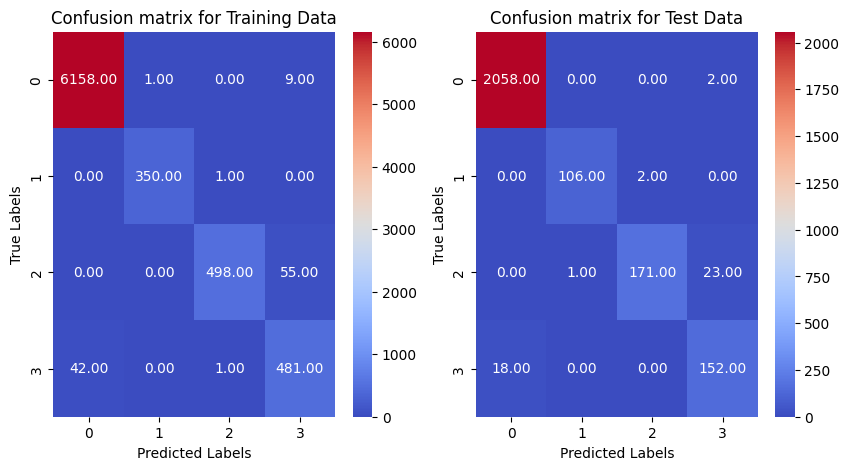

In [ ]:
#Scaled -> SVM
#Defining the SVM model with Scaled data


SVM_obj = svm.SVC(kernel = 'linear', C=0.1, random_state=0)
SVM_obj.fit(X_Tr_Scaled,y_Train)

response_predictor_Tr = SVM_obj.predict(X_Tr_Scaled)
response_predictor_Te = SVM_obj.predict(X_Te_Scaled)

#Cross validation Score to determine which knn model would perform better
cv_score= cross_val_score(SVM_obj,X_Te_Scaled,y_Test, cv = 5 )
Mean_s = cv_score.mean()
print(f"Cv score{Mean_s}")
std_s =cv_score.std()
print(f"CV score Standard deviation: {std_s}")

#Evaluating the model's performance
#Accuracy of the model
Acc= accuracy_score(y_Test,response_predictor_Te)
print(f"      !!!!!!!!!!!!!! ACCURACY SCORE : {Acc}")

print("    *****************SVM Model's Performance***************** \n            -------------With Scaled data-------------\n",classification_report(y_Train,response_predictor_Tr,digits=3))
print("----For Training data----")
Figure, axes= plt.subplots(ncols=2, figsize= (10,5))
c_m_1 = confusion_matrix(y_Train, response_predictor_Tr)
sns.heatmap(c_m_1, cmap='coolwarm',annot=True,fmt='.2f', ax= axes[0])
axes[0].set_title('Confusion matrix for Training Data')
axes[0].set_xlabel('Predicted Labels') 
axes[0].set_ylabel('True Labels')
print("    *****************SVM Model's Performance***************** \n            -------------With Scaled data-------------\n",classification_report(y_Test,response_predictor_Te,digits=3))
c_m_2 = confusion_matrix(y_Test, response_predictor_Te)
sns.heatmap(c_m_2, cmap='coolwarm',annot=True,fmt='.2f',  ax= axes[1])
axes[1].set_title('Confusion matrix for Test Data')
axes[1].set_xlabel('Predicted Labels') 
axes[1].set_ylabel('True Labels')



Cv score: 0.9216019417475728
CV score Standard deviation: 0.0048906411843713206
      !!!!!!!!!!!!!! ACCURACY SCORE : 0.9243932038834951
    *****************SVM Model's Performance***************** 
            -------------With Sampled data-------------
               precision    recall  f1-score   support

           0      0.921     0.917     0.919      6168
           1      1.000     0.999     0.999      6168
           2      0.998     0.905     0.949      6168
           3      0.839     0.921     0.878      6168

    accuracy                          0.936     24672
   macro avg      0.939     0.936     0.936     24672
weighted avg      0.939     0.936     0.936     24672

----For Training data----
    *****************SVM Model's Performance***************** 
            -------------With Sampled data-------------
               precision    recall  f1-score   support

           0      0.910     0.918     0.914      2060
           1      0.998     0.986     0.992      2060

Text(518.4494949494949, 0.5, 'True Labels')

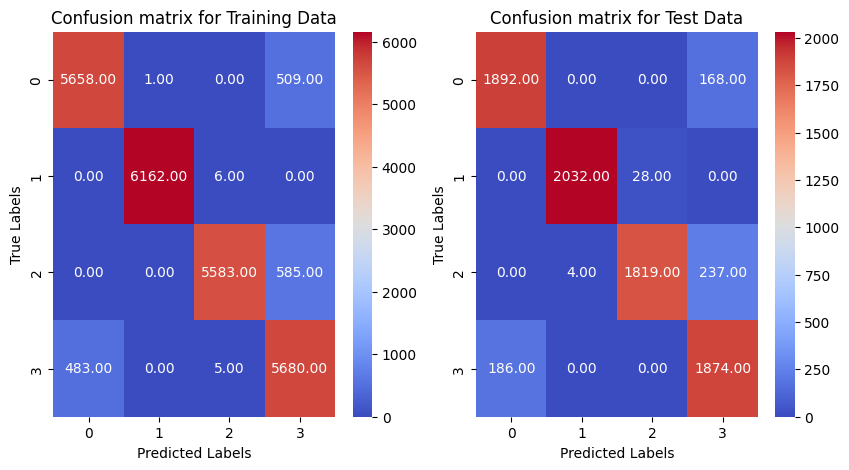

In [ ]:
#Sampled data -> SVM
#Defining the SVM model with Sampled data

SVM_obj = svm.SVC(kernel = 'rbf', C=1, random_state=0)
SVM_obj.fit(X_Tr_Sampled,y_Tr_Sampled)

response_predictor_Tr = SVM_obj.predict(X_Tr_Sampled)
response_predictor_Te = SVM_obj.predict(X_Te_Sampled)

#Cross validation Score to determine which knn model would perform better
cv_score= cross_val_score(SVM_obj,X_Te_Sampled,y_Te_Sampled, cv = 5 )
Mean_s = cv_score.mean()
std_s =cv_score.std()
print(f"Cross validation score: {Mean_s}")
print(f"CV score Standard deviation: {std_s}")


#Evaluating the model's performance

#Accuracy of the model
Acc= accuracy_score(y_Te_Sampled,response_predictor_Te)
print(f"      !!!!!!!!!!!!!! ACCURACY SCORE : {Acc}")

print("    *****************SVM Model's Performance***************** \n            -------------With Sampled data-------------\n",classification_report(y_Tr_Sampled,response_predictor_Tr,digits=3))
print("----For Training data----")
Figure, axes= plt.subplots(ncols=2, figsize= (10,5))
c_m_1 = confusion_matrix(y_Tr_Sampled, response_predictor_Tr)
sns.heatmap(c_m_1, cmap='coolwarm',annot=True,fmt='.2f', ax= axes[0])
axes[0].set_title('Confusion matrix for Training Data')
axes[0].set_xlabel('Predicted Labels') 
axes[0].set_ylabel('True Labels')

# To download the csv file.
C_R =classification_report(y_Te_Sampled,response_predictor_Te,digits = 3,output_dict=True)
#print(C_R)
lr_file = pd.DataFrame(C_R).transpose()
# Save the classication report into a CSV file
lr_file.to_csv('SVM_CR.csv', float_format='%.3f')

print("    *****************SVM Model's Performance***************** \n            -------------With Sampled data-------------\n",classification_report(y_Te_Sampled,response_predictor_Te,digits=3))
c_m_2 = confusion_matrix(y_Te_Sampled, response_predictor_Te)
sns.heatmap(c_m_2, cmap='coolwarm',annot=True,fmt='.2f',  ax= axes[1])
axes[1].set_title('Confusion matrix for Test Data')
axes[1].set_xlabel('Predicted Labels') 
axes[1].set_ylabel('True Labels')

MODEL 4 Decision Tree

In [ ]:
#version 1
#Decision Tree
Decision_Tree_obj= tree.DecisionTreeClassifier(max_depth=5,ccp_alpha=0.1,random_state=0)
Decision_Tree_obj.fit(X_Train,y_Train)

response_predictor_Tr = Decision_Tree_obj.predict(X_Train)
response_predictor_Te = Decision_Tree_obj.predict(X_Test)

#Evaluating the model's performance

#Accuracy of the model
Acc= accuracy_score(y_Test,response_predictor_Te)
print(f"      !!!!!!!!!!!!!! ACCURACY SCORE : {Acc}")

print("    ***************** Decision Tree's Performance ***************** \n            -------------With Test data-------------\n",classification_report(y_Test,response_predictor_Te,digits=3))
print("    ***************** Decision Tree's Performance ***************** \n            -------------With Training data-------------\n",classification_report(y_Train,response_predictor_Tr,digits=3))

      !!!!!!!!!!!!!! ACCURACY SCORE : 0.890248716936439
    ***************** Decision Tree's Performance ***************** 
            -------------With Test data-------------
               precision    recall  f1-score   support

           0      0.973     1.000     0.986      2060
           1      0.000     0.000     0.000       108
           2      0.469     1.000     0.638       195
           3      0.000     0.000     0.000       170

    accuracy                          0.890      2533
   macro avg      0.360     0.500     0.406      2533
weighted avg      0.827     0.890     0.851      2533

    ***************** Decision Tree's Performance ***************** 
            -------------With Training data-------------
               precision    recall  f1-score   support

           0      0.980     1.000     0.990      6168
           1      0.000     0.000     0.000       351
           2      0.426     1.000     0.597       553
           3      0.000     0.000     0.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

**Below is best performing Decision Tree model of all .**

Cv score: 0.964074498522659
CV score Standard deviation: 0.004893822466689172
      !!!!!!!!!!!!!! ACCURACY SCORE : 0.9798657718120806
    ***************** Decision Tree's Performance ***************** 
            -------------With Training data-------------
               precision    recall  f1-score   support

           0      0.986     1.000     0.993      6168
           1      0.994     0.997     0.996       351
           2      0.993     0.967     0.980       553
           3      0.962     0.832     0.893       524

    accuracy                          0.986      7596
   macro avg      0.984     0.949     0.965      7596
weighted avg      0.986     0.986     0.985      7596

    ***************** Decision Tree's Performance ***************** 
            -------------With Test data-------------
               precision    recall  f1-score   support

           0      0.981     1.000     0.990      2060
           1      0.991     0.981     0.986       108
           2     

Text(518.4494949494949, 0.5, 'True Labels')

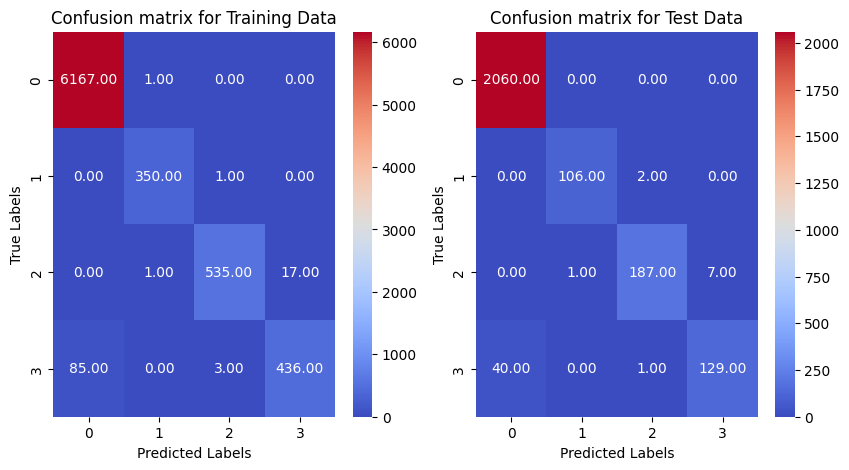

In [ ]:
#version 2
# Feature selection data & PCA -> Decision Tree
# Decision Tree Classifier using usual data
#PCA
P_C_A = PCA(n_components=5)
P_C_A.fit(X_Train)
X_Tr_Revised = P_C_A.transform(X_Train)
X_Te_Revised = P_C_A.transform(X_Test)

#Decision Tree
Decision_Tree_obj= tree.DecisionTreeClassifier(max_depth=5,ccp_alpha=0.001,random_state=0)
Decision_Tree_obj.fit(X_Tr_Revised,y_Train)

response_predictor_Tr = Decision_Tree_obj.predict(X_Tr_Revised)
response_predictor_Te = Decision_Tree_obj.predict(X_Te_Revised)

#Cross validation Score to determine which knn model would perform better
cv_score= cross_val_score(Decision_Tree_obj,X_Te_Revised,y_Test, cv = 5 )
Mean_s = cv_score.mean()
std_s =cv_score.std()
print(f"Cv score: {Mean_s}")
print(f"CV score Standard deviation: {std_s}")

#Evaluating the model's performance

#Accuracy of the model
Acc= accuracy_score(y_Test,response_predictor_Te)
print(f"      !!!!!!!!!!!!!! ACCURACY SCORE : {Acc}")

print("    ***************** Decision Tree's Performance ***************** \n            -------------With Training data-------------\n",classification_report(y_Train,response_predictor_Tr,digits=3))
Figure, axes= plt.subplots(ncols=2, figsize= (10,5))
c_m_1 = confusion_matrix(y_Train, response_predictor_Tr)
sns.heatmap(c_m_1, cmap='coolwarm',annot=True,fmt='.2f', ax= axes[0])
axes[0].set_title('Confusion matrix for Training Data')
axes[0].set_xlabel('Predicted Labels') 
axes[0].set_ylabel('True Labels')

C_R =classification_report(y_Test,response_predictor_Te,digits = 3,output_dict=True)
#print(C_R)
lr_file = pd.DataFrame(C_R).transpose()
# Save the classication report into a CSV file
lr_file.to_csv('DT_CR.csv', float_format='%.3f')

print("    ***************** Decision Tree's Performance ***************** \n            -------------With Test data-------------\n",classification_report(y_Test,response_predictor_Te,digits=3))
c_m_2 = confusion_matrix(y_Test, response_predictor_Te)
sns.heatmap(c_m_2, cmap='coolwarm',annot=True,fmt='.2f',  ax= axes[1])
axes[1].set_title('Confusion matrix for Test Data')
axes[1].set_xlabel('Predicted Labels') 
axes[1].set_ylabel('True Labels')


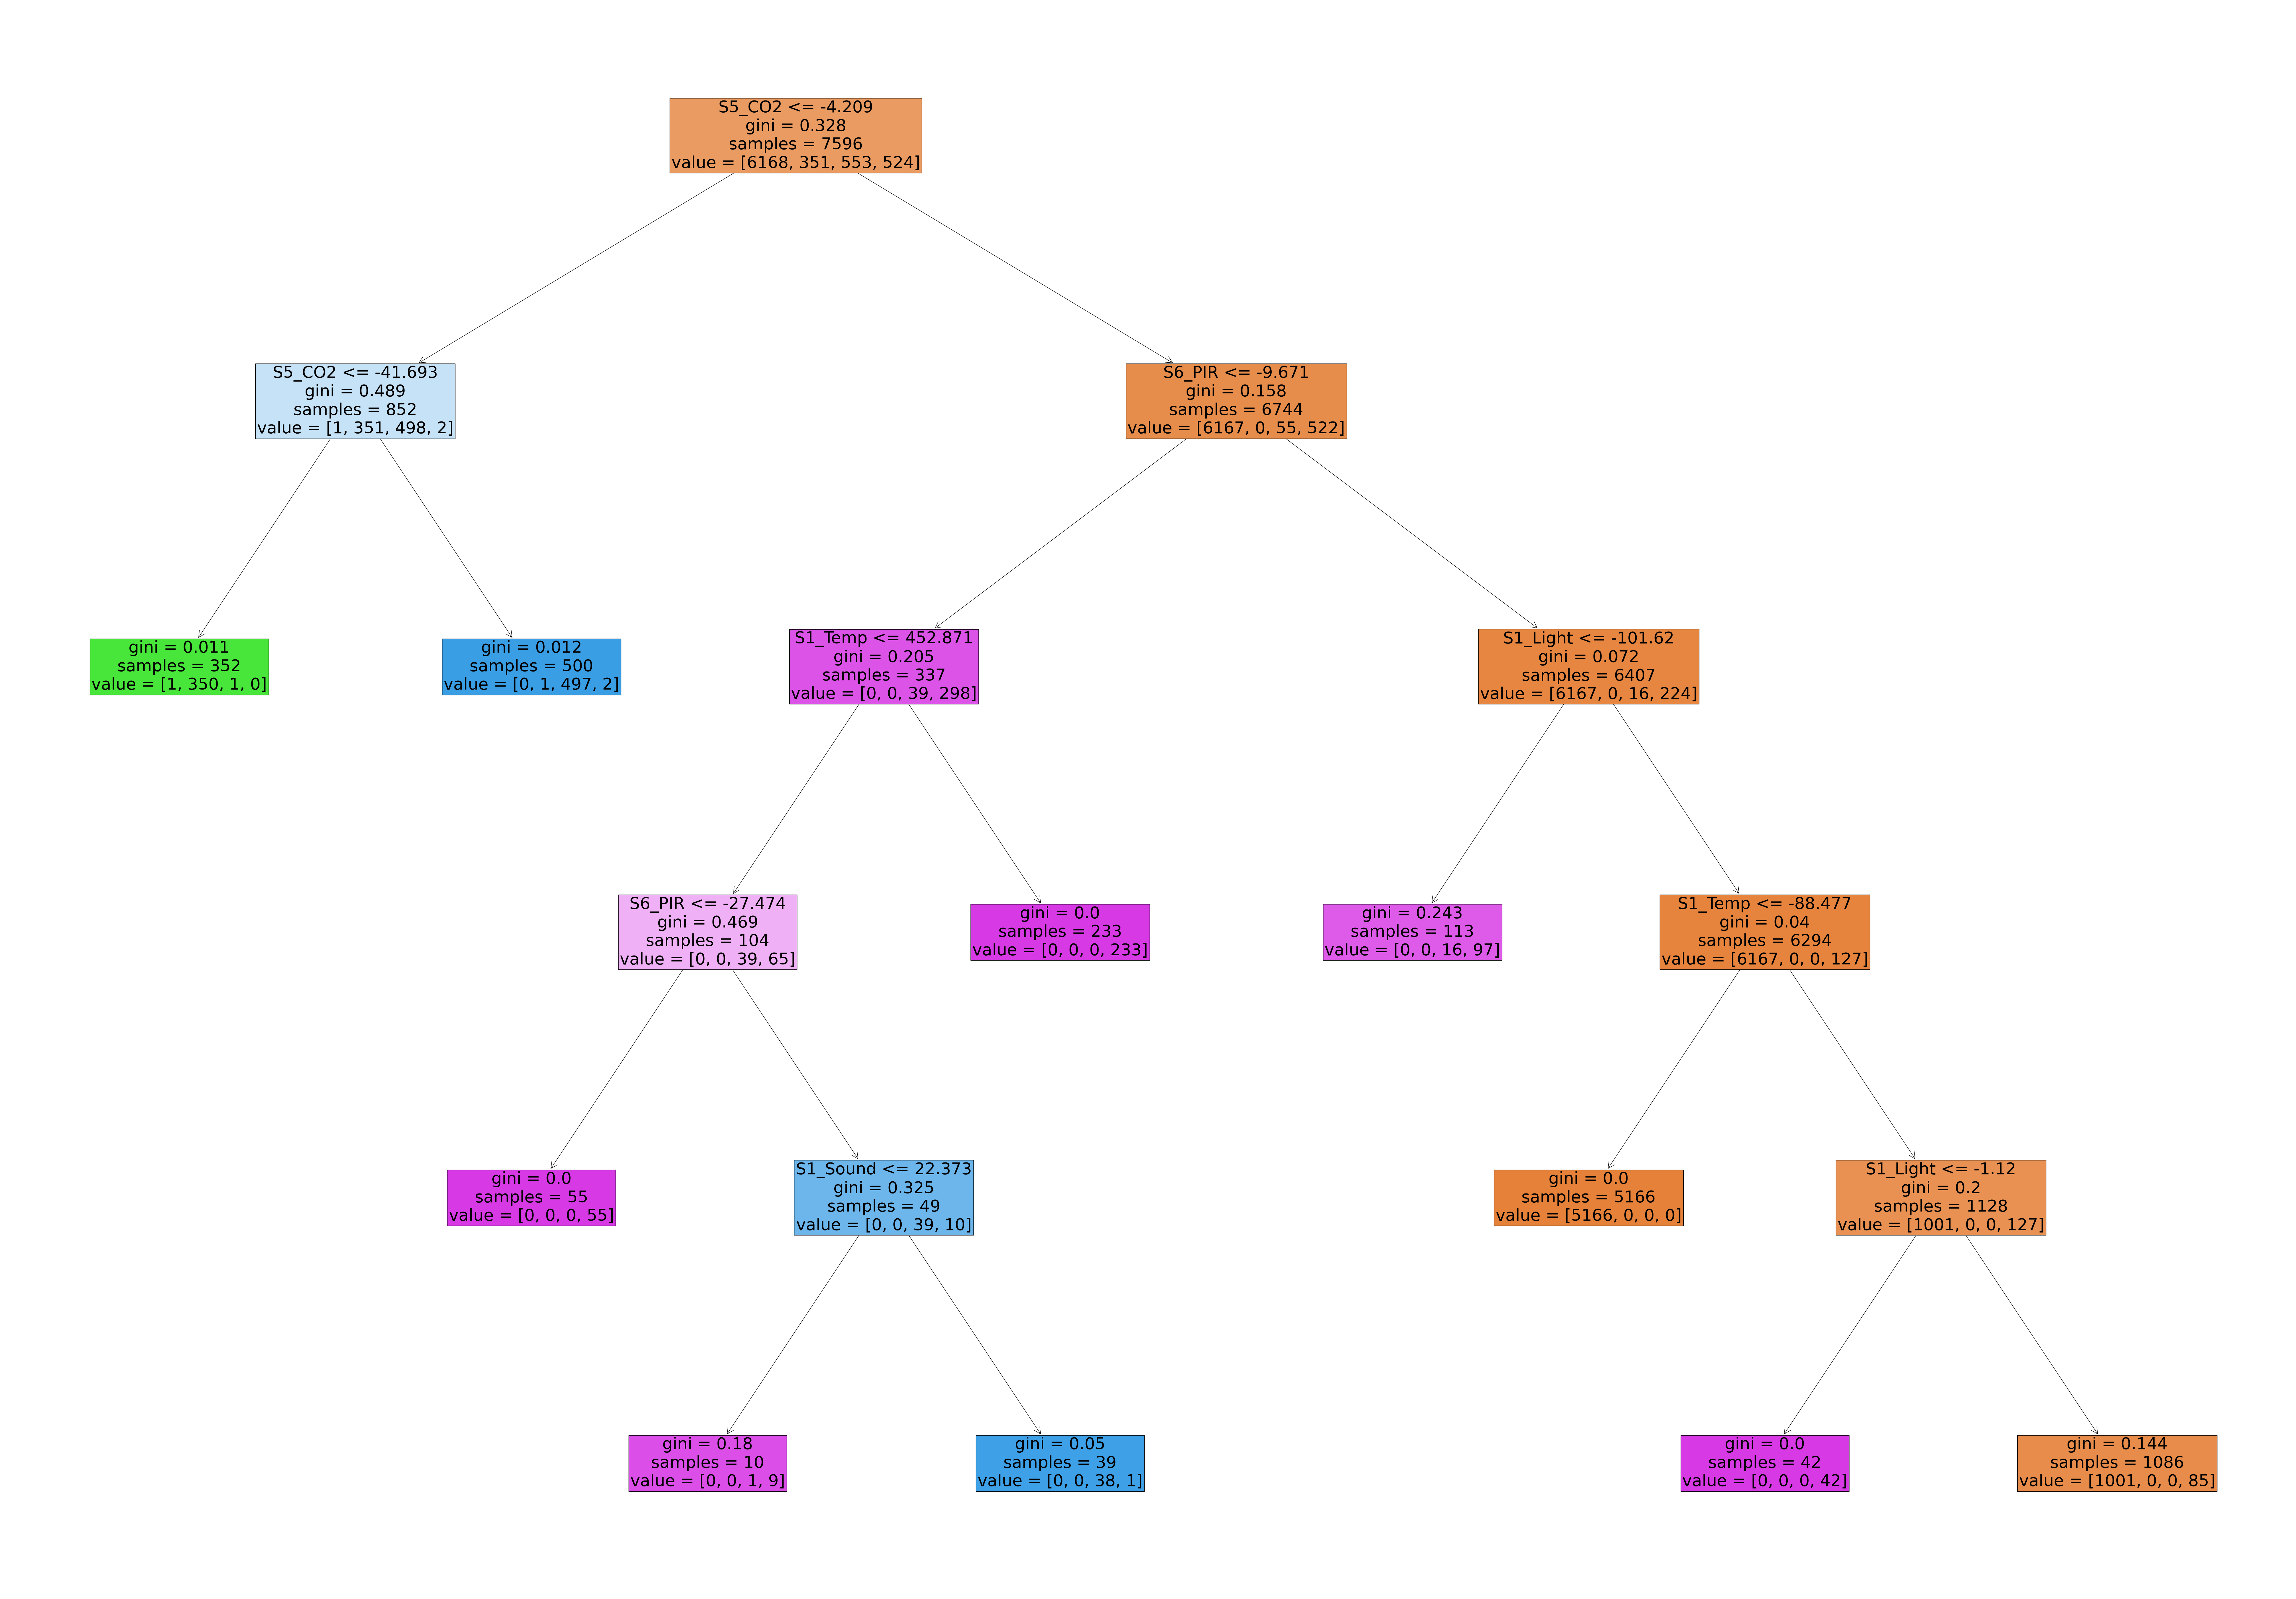

In [ ]:
plt.figure(figsize=(100,70))
tree.plot_tree(Decision_Tree_obj, feature_names= list(Cols), filled= True, fontsize=40)
plt.savefig('decision_tree_best.png')
plt.show()

Cv score: 0.9680308736111544
CV score Standard deviation: 0.01160805131977637
      !!!!!!!!!!!!!! ACCURACY SCORE : 0.9735491512041058
    ***************** Decision Tree's Performance ***************** 
            -------------With Training data-------------
               precision    recall  f1-score   support

           0      0.995     0.996     0.995      6168
           1      0.974     0.957     0.966       351
           2      0.943     0.868     0.904       553
           3      0.859     0.927     0.892       524

    accuracy                          0.980      7596
   macro avg      0.943     0.937     0.939      7596
weighted avg      0.981     0.980     0.980      7596

    ***************** Decision Tree's Performance ***************** 
            -------------With Test data-------------
               precision    recall  f1-score   support

           0      0.992     0.996     0.994      2060
           1      0.952     0.926     0.939       108
           2     

Text(518.4494949494949, 0.5, 'True Labels')

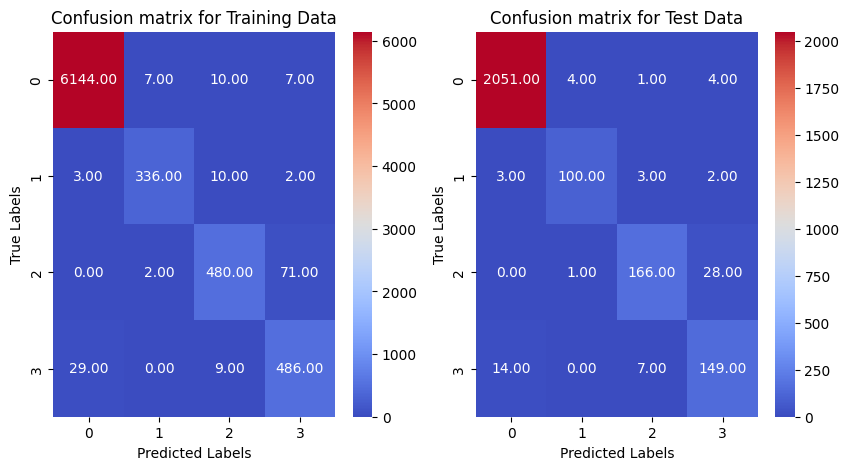

In [ ]:
#version 3
# Decision Tree Classifier using Scaled data

#PCA
P_C_A = PCA(n_components=5)
P_C_A.fit(X_Tr_Scaled)
X_Tr_Revised = P_C_A.transform(X_Tr_Scaled)
X_Te_Revised = P_C_A.transform(X_Te_Scaled)

#Initialising and fitting the Decision tree object
Decision_Tree_obj= tree.DecisionTreeClassifier(max_depth=5,ccp_alpha=0.001,random_state=0)
Decision_Tree_obj.fit(X_Tr_Revised,y_Train)

response_predictor_Tr = Decision_Tree_obj.predict(X_Tr_Revised)
response_predictor_Te = Decision_Tree_obj.predict(X_Te_Revised)

#Cross validation Score to determine which knn model would perform better
cv_score= cross_val_score(Decision_Tree_obj,X_Te_Revised,y_Test, cv = 10 )
Mean_s = cv_score.mean()
std_s =cv_score.std()
print(f"Cv score: {Mean_s}")
print(f"CV score Standard deviation: {std_s}")

#Evaluating the model's performance

#Accuracy of the model
Acc= accuracy_score(y_Test,response_predictor_Te)
print(f"      !!!!!!!!!!!!!! ACCURACY SCORE : {Acc}")

print("    ***************** Decision Tree's Performance ***************** \n            -------------With Training data-------------\n",classification_report(y_Train,response_predictor_Tr,digits=3))
#print("----For Training data----")
Figure, axes= plt.subplots(ncols=2, figsize= (10,5))
c_m_1 = confusion_matrix(y_Train, response_predictor_Tr)
sns.heatmap(c_m_1, cmap='coolwarm',annot=True,fmt='.2f', ax= axes[0])
axes[0].set_title('Confusion matrix for Training Data')
axes[0].set_xlabel('Predicted Labels') 
axes[0].set_ylabel('True Labels')
print("    ***************** Decision Tree's Performance ***************** \n            -------------With Test data-------------\n",classification_report(y_Test,response_predictor_Te,digits=3))
c_m_2 = confusion_matrix(y_Test, response_predictor_Te)
sns.heatmap(c_m_2, cmap='coolwarm',annot=True,fmt='.2f',  ax= axes[1])
axes[1].set_title('Confusion matrix for Test Data')
axes[1].set_xlabel('Predicted Labels') 
axes[1].set_ylabel('True Labels')


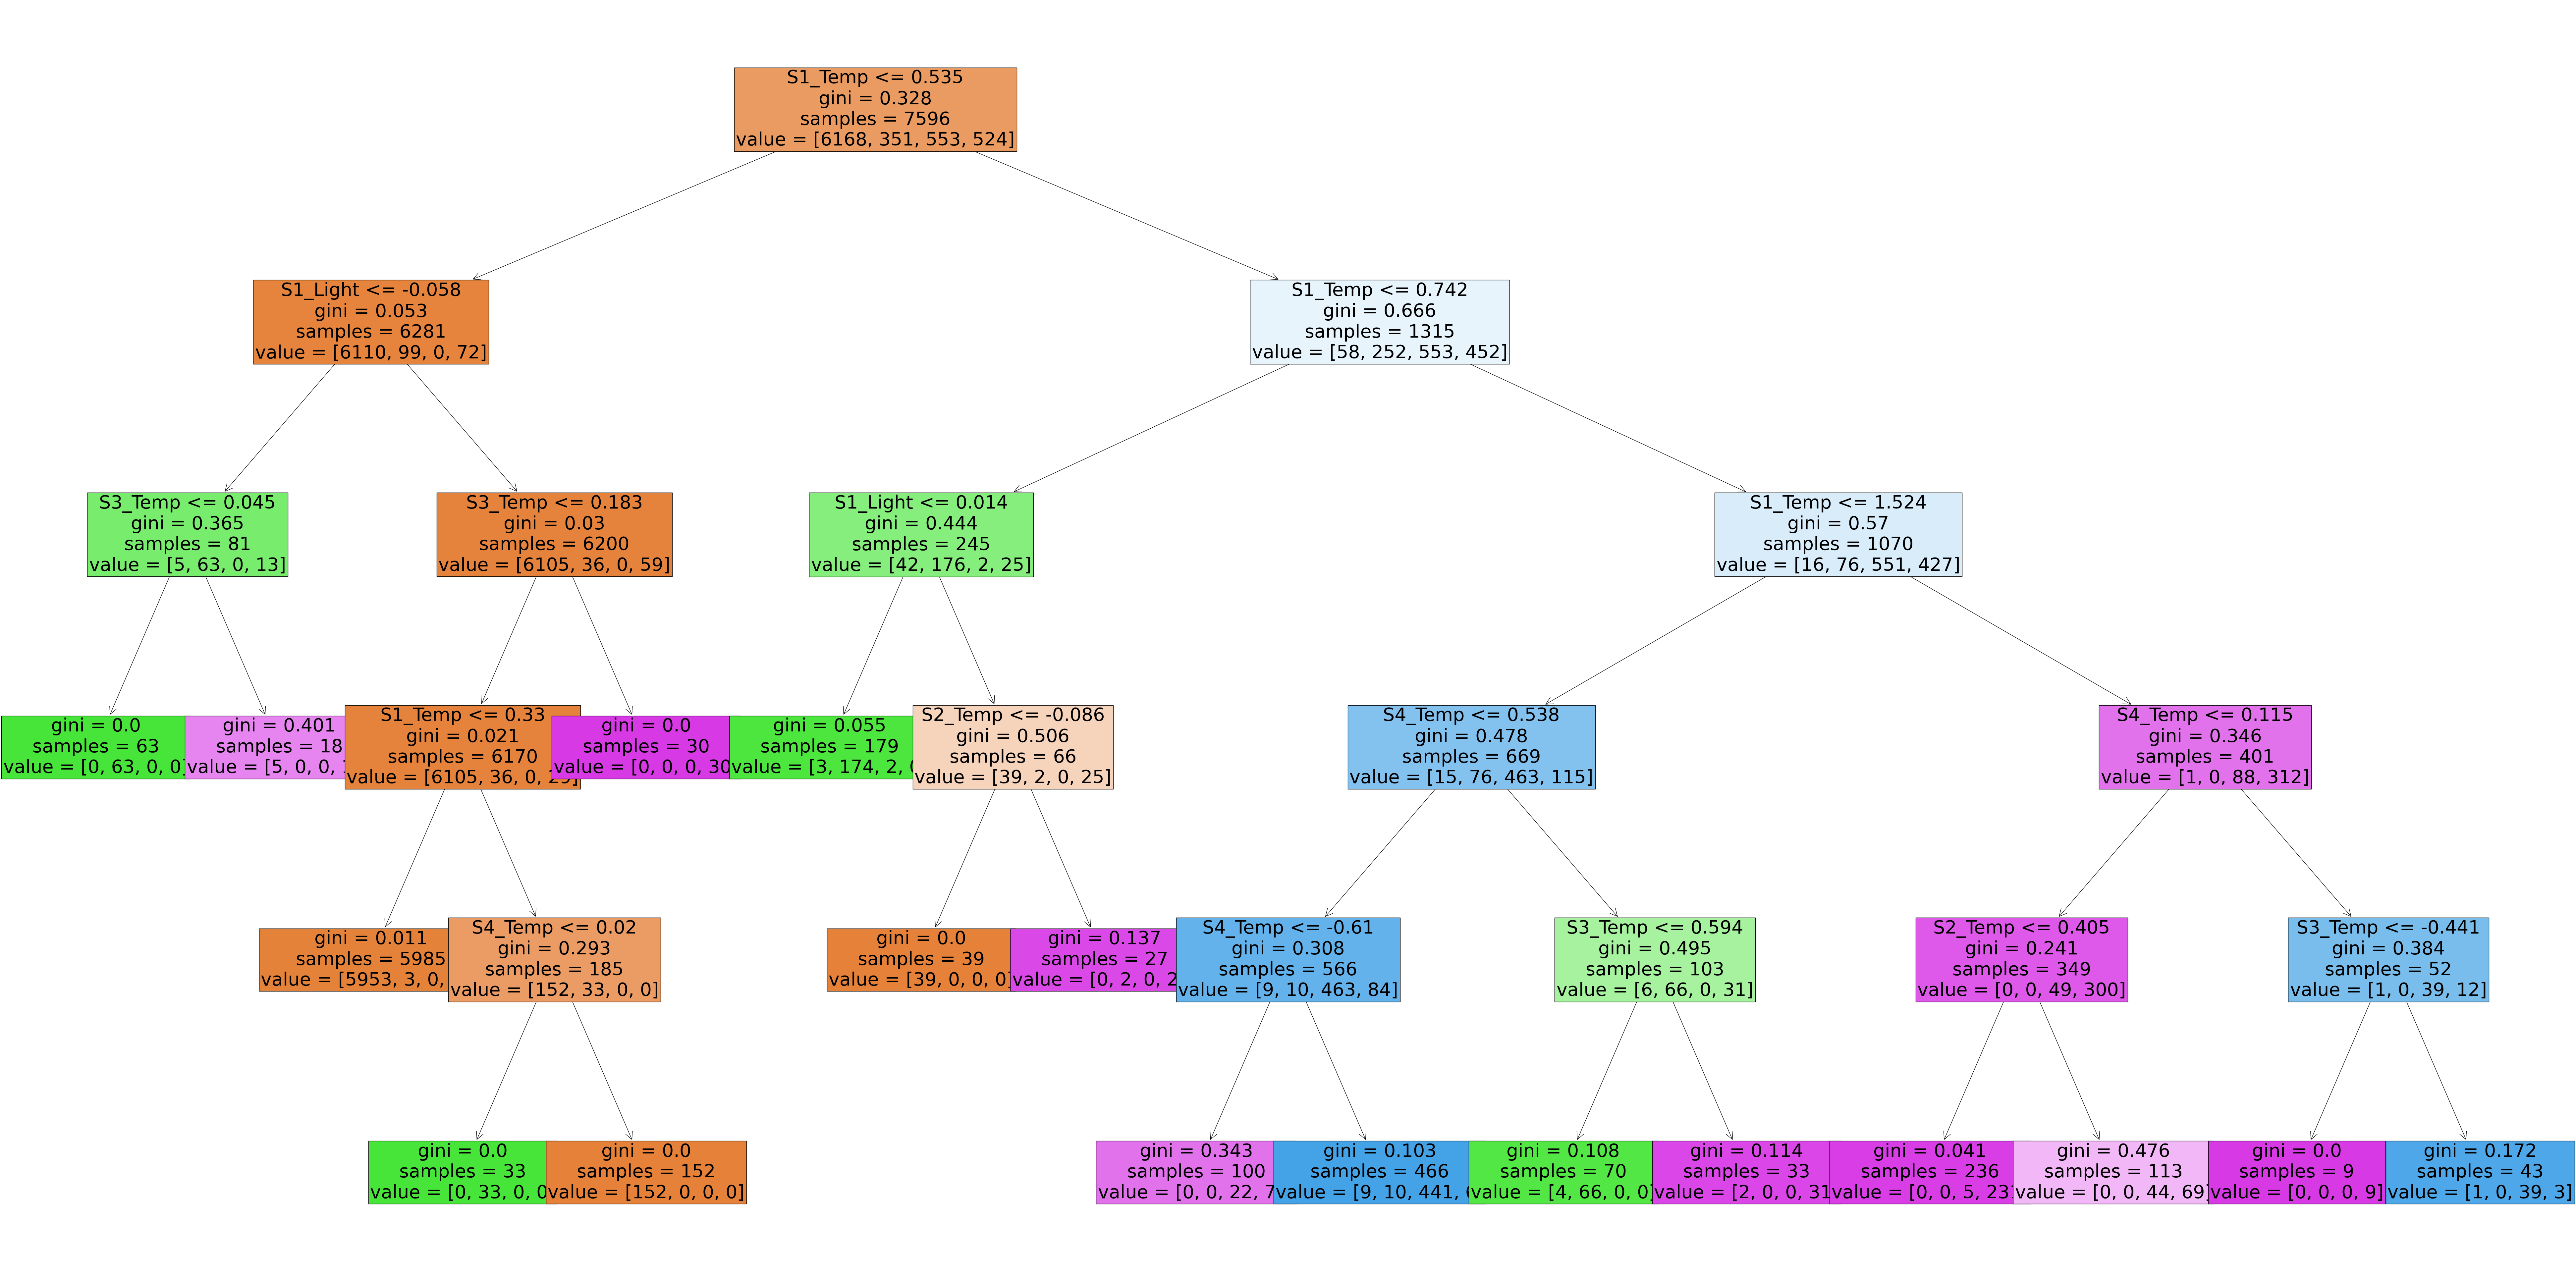

In [ ]:
plt.figure(figsize=(100,50))
tree.plot_tree(Decision_Tree_obj, feature_names= list(X_Train.columns), filled= True, fontsize=40)
plt.show()

Cv score: 0.9184466019417477
CV score Standard deviation: 0.005171668872005458
      !!!!!!!!!!!!!! ACCURACY SCORE : 0.933009708737864
    ***************** Decision Tree's Performance ***************** 
            -------------With Training data-------------
               precision    recall  f1-score   support

           0      0.999     0.862     0.925      6168
           1      1.000     0.998     0.999      6168
           2      0.998     0.911     0.952      6168
           3      0.814     0.999     0.897      6168

    accuracy                          0.942     24672
   macro avg      0.953     0.942     0.943     24672
weighted avg      0.953     0.942     0.943     24672

    ***************** Decision Tree's Performance ***************** 
            -------------With Test data-------------
               precision    recall  f1-score   support

           0      0.999     0.869     0.930      2060
           1      0.998     0.992     0.995      2060
           2     

Text(518.4494949494949, 0.5, 'True Labels')

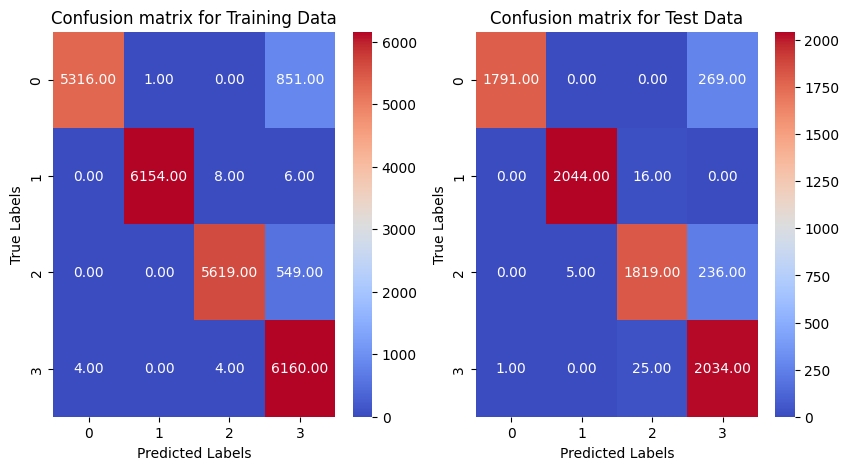

In [ ]:
# Decision Tree Classifier using Over Sampled data

P_C_A = PCA(n_components=10)
P_C_A.fit(X_Tr_Sampled)
X_Tr_Revised = P_C_A.transform(X_Tr_Sampled)
X_Te_Revised = P_C_A.transform(X_Te_Sampled)

Decision_Tree_obj= tree.DecisionTreeClassifier(max_depth=5,ccp_alpha=0.001,random_state=0)
Decision_Tree_obj.fit(X_Tr_Revised,y_Tr_Sampled)

response_predictor_Tr = Decision_Tree_obj.predict(X_Tr_Revised)
response_predictor_Te = Decision_Tree_obj.predict(X_Te_Revised)

#Cross validation Score to determine which knn model would perform better
cv_score= cross_val_score(Decision_Tree_obj,X_Te_Revised,y_Te_Sampled, cv = 5 )
Mean_s = cv_score.mean()
std_s =cv_score.std()
print(f"Cv score: {Mean_s}")
print(f"CV score Standard deviation: {std_s}")
#Evaluating the model's performance

#Accuracy of the model
Acc= accuracy_score(y_Te_Sampled,response_predictor_Te)
print(f"      !!!!!!!!!!!!!! ACCURACY SCORE : {Acc}")

print("    ***************** Decision Tree's Performance ***************** \n            -------------With Training data-------------\n",classification_report(y_Tr_Sampled,response_predictor_Tr,digits=3))

Figure, axes= plt.subplots(ncols=2, figsize= (10,5))
c_m_1 = confusion_matrix(y_Tr_Sampled, response_predictor_Tr)
sns.heatmap(c_m_1, cmap='coolwarm',annot=True,fmt='.2f', ax= axes[0])
axes[0].set_title('Confusion matrix for Training Data')
axes[0].set_xlabel('Predicted Labels') 
axes[0].set_ylabel('True Labels')


print("    ***************** Decision Tree's Performance ***************** \n            -------------With Test data-------------\n",classification_report(y_Te_Sampled,response_predictor_Te,digits=3))
c_m_2 = confusion_matrix(y_Te_Sampled, response_predictor_Te)
sns.heatmap(c_m_2, cmap='coolwarm',annot=True,fmt='.2f',  ax= axes[1])
axes[1].set_title('Confusion matrix for Test Data')
axes[1].set_xlabel('Predicted Labels') 
axes[1].set_ylabel('True Labels')


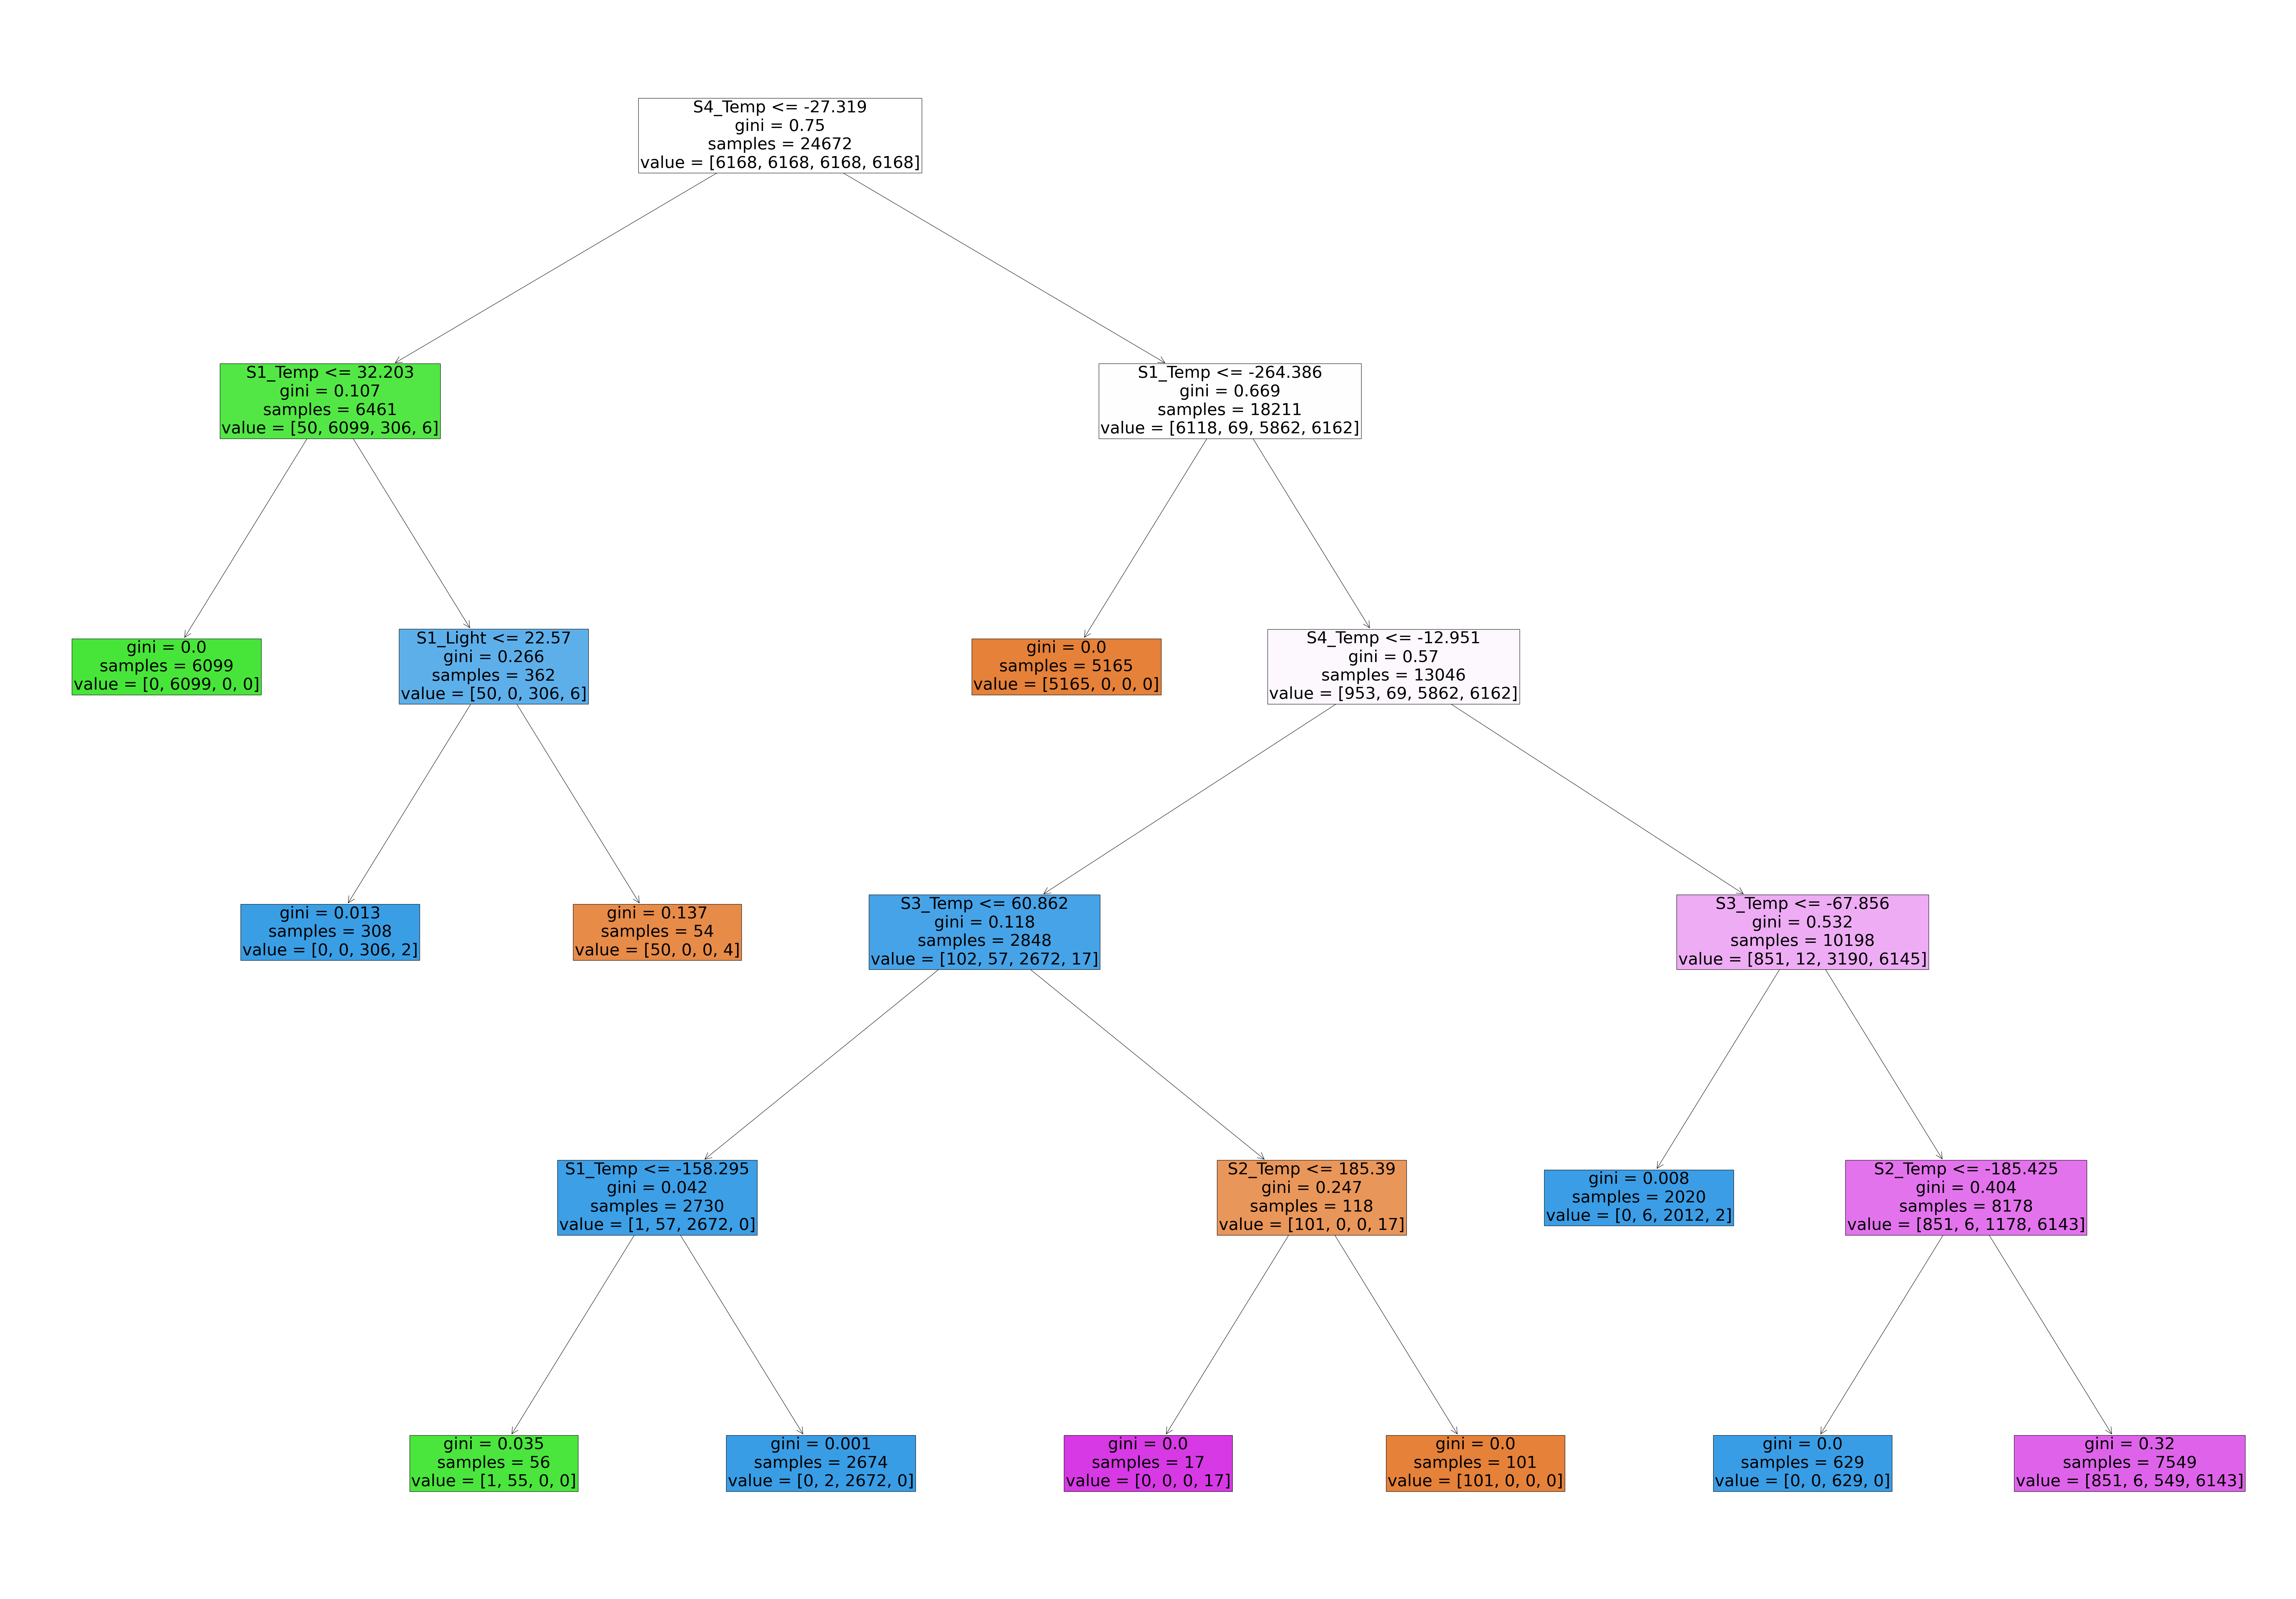

In [ ]:
plt.figure(figsize=(100,70))
tree.plot_tree(Decision_Tree_obj, feature_names= list(X_Train.columns), filled= True, fontsize=40)
plt.savefig('decision_tree.png')
plt.show()

MODEL 5 Random Forest

**Below is best performing Random Forest model of all .**

In [130]:
#Random Forest implementation
RF_obj= RandomForestClassifier(n_estimators=30,min_samples_leaf=3,max_features=6,random_state=0)
RF_obj.fit(X_Train,y_Train)

response_predictor_Tr = RF_obj.predict(X_Train)
response_predictor_Te = RF_obj.predict(X_Test)

#Evaluating the model's performance

#Accuracy of the model
Acc= accuracy_score(y_Test,response_predictor_Te)
print(f"      !!!!!!!!!!!!!! ACCURACY SCORE : {Acc}")


      !!!!!!!!!!!!!! ACCURACY SCORE : 0.9948677457560205


Cv score: 0.979077889780231
CV score Standard deviation: 0.005230899399794069
      !!!!!!!!!!!!!! ACCURACY SCORE : 0.98499802605606
    ***************** Random Forest Classifier's Performance ***************** 
            -------------With Training data-------------
               precision    recall  f1-score   support

           0      0.998     0.999     0.999      6168
           1      0.986     0.980     0.983       351
           2      0.977     0.978     0.977       553
           3      0.975     0.971     0.973       524

    accuracy                          0.995      7596
   macro avg      0.984     0.982     0.983      7596
weighted avg      0.995     0.995     0.995      7596

    ***************** Random Forest Classifier's Performance ***************** 
            -------------With Test data-------------
               precision    recall  f1-score   support

           0      0.995     0.995     0.995      2060
           1      0.990     0.944     0.967       1

Text(518.4494949494949, 0.5, 'True Labels')

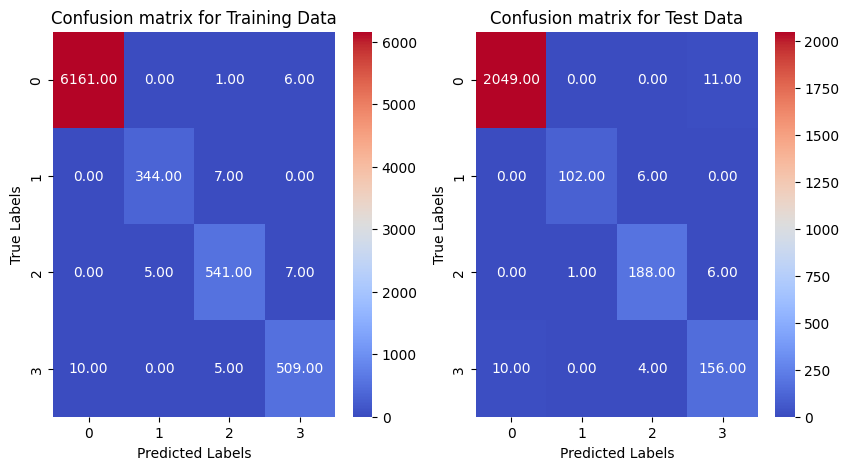

In [113]:
#Random forest with usual data

#Selecting highly correlated columns only
Cols = ['S1_Temp', 'S1_Light','S1_Sound', 'S5_CO2','S7_PIR']
#Using PCA to fit in to reduce dimensionality
P_C_A = PCA(n_components=5)
P_C_A.fit(X_Train[Cols])
X_Tr_Revised = P_C_A.transform(X_Train[Cols])
X_Te_Revised = P_C_A.transform(X_Test[Cols])

#Random Forest implementation
RF_obj= RandomForestClassifier(n_estimators=30, min_samples_leaf=5,random_state=0)
RF_obj.fit(X_Tr_Revised,y_Train)

response_predictor_Tr = RF_obj.predict(X_Tr_Revised)
response_predictor_Te = RF_obj.predict(X_Te_Revised)

#Cross validation Score to determine which knn model would perform better
cv_score= cross_val_score(RF_obj,X_Te_Revised,y_Test, cv = 5 )
Mean_s = cv_score.mean()
std_s =cv_score.std()
print(f"Cv score: {Mean_s}")
print(f"CV score Standard deviation: {std_s}")

#Evaluating the model's performance

#Accuracy of the model
Acc= accuracy_score(y_Test,response_predictor_Te)
print(f"      !!!!!!!!!!!!!! ACCURACY SCORE : {Acc}")

print("    ***************** Random Forest Classifier's Performance ***************** \n            -------------With Training data-------------\n",classification_report(y_Train,response_predictor_Tr,digits=3))
Figure, axes= plt.subplots(ncols=2, figsize= (10,5))
c_m_1 = confusion_matrix(y_Train, response_predictor_Tr)
sns.heatmap(c_m_1, cmap='coolwarm',annot=True,fmt='.2f', ax= axes[0])
axes[0].set_title('Confusion matrix for Training Data')
axes[0].set_xlabel('Predicted Labels') 
axes[0].set_ylabel('True Labels')

print("    ***************** Random Forest Classifier's Performance ***************** \n            -------------With Test data-------------\n",classification_report(y_Test,response_predictor_Te,digits=3))
c_m_2 = confusion_matrix(y_Test, response_predictor_Te)
sns.heatmap(c_m_2, cmap='coolwarm',annot=True,fmt='.2f',  ax= axes[1])
axes[1].set_title('Confusion matrix for Test Data')
axes[1].set_xlabel('Predicted Labels') 
axes[1].set_ylabel('True Labels')



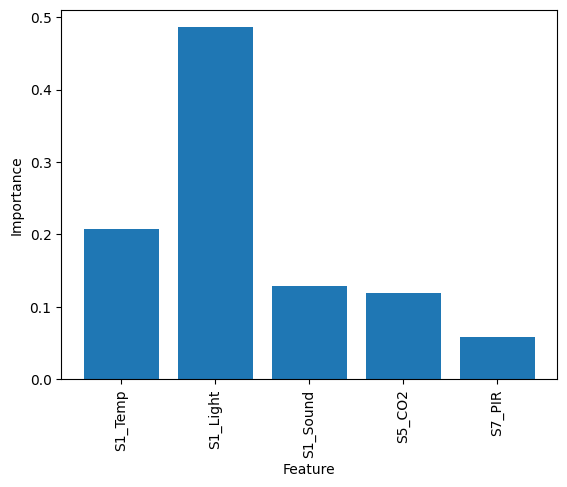

In [114]:
#Visualising the data to hsow the importance of each selected feature
#PCA_columns = X_Tr_Revised.columns[P_C_A.components_.argsort()[-5:][::-1]]
#print(PCA_columns)
plt.bar(range(X_Tr_Revised.shape[1]), RF_obj.feature_importances_)
plt.xticks(range(X_Tr_Revised.shape[1]), labels=list(Cols), rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.savefig('features_i_R_F.png')
plt.show()



Cv score: 0.983425663689272
CV score Standard deviation: 0.008768191541846947
      !!!!!!!!!!!!!! ACCURACY SCORE : 0.9889459139360443
    ***************** Random Forest Classifier's Performance ***************** 
            -------------With Training data-------------
               precision    recall  f1-score   support

           0      1.000     0.999     0.999      6168
           1      1.000     0.994     0.997       351
           2      0.982     0.982     0.982       553
           3      0.970     0.985     0.977       524

    accuracy                          0.996      7596
   macro avg      0.988     0.990     0.989      7596
weighted avg      0.996     0.996     0.996      7596

    ***************** Random Forest Classifier's Performance ***************** 
            -------------With Test data-------------
               precision    recall  f1-score   support

           0      1.000     0.996     0.998      2060
           1      1.000     0.963     0.981      

Text(518.4494949494949, 0.5, 'True Labels')

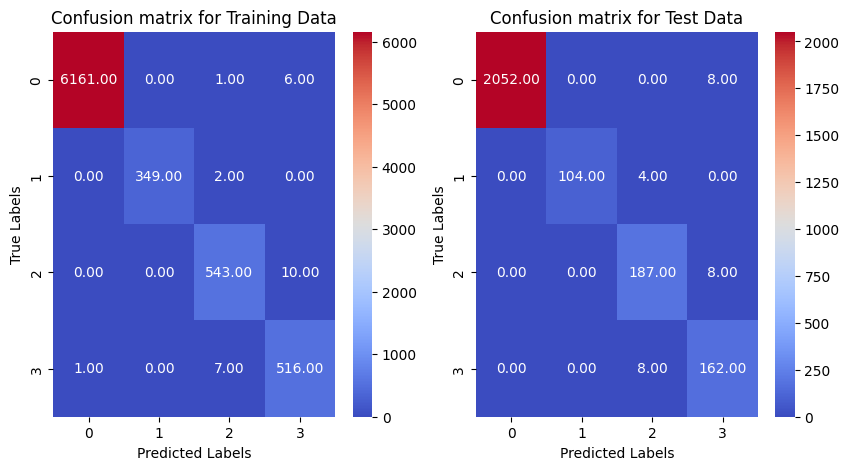

In [ ]:
# Random Forest Classifier using Scaled data

#PCA
P_C_A = PCA(n_components=8)
P_C_A.fit(X_Tr_Scaled)
X_Tr_Revised = P_C_A.transform(X_Tr_Scaled)
X_Te_Revised = P_C_A.transform(X_Te_Scaled)

#Initialising and fitting the Random Forest object
RF_obj= RandomForestClassifier(n_estimators=50,min_samples_leaf=5,random_state=0)
RF_obj.fit(X_Tr_Revised,y_Train)

response_predictor_Tr = RF_obj.predict(X_Tr_Revised)
response_predictor_Te = RF_obj.predict(X_Te_Revised)


#Cross validation Score to determine which knn model would perform better
cv_score= cross_val_score(RF_obj,X_Te_Revised,y_Test, cv = 10 )
Mean_s = cv_score.mean()
std_s =cv_score.std()
print(f"Cv score: {Mean_s}")
print(f"CV score Standard deviation: {std_s}")

#Evaluating the model's performance

#Accuracy of the model
Acc= accuracy_score(y_Test,response_predictor_Te)
print(f"      !!!!!!!!!!!!!! ACCURACY SCORE : {Acc}")

print("    ***************** Random Forest Classifier's Performance ***************** \n            -------------With Training data-------------\n",classification_report(y_Train,response_predictor_Tr,digits=3))
#print("----For Training data----")
Figure, axes= plt.subplots(ncols=2, figsize= (10,5))
c_m_1 = confusion_matrix(y_Train, response_predictor_Tr)
sns.heatmap(c_m_1, cmap='coolwarm',annot=True,fmt='.2f', ax= axes[0])
axes[0].set_title('Confusion matrix for Training Data')
axes[0].set_xlabel('Predicted Labels') 
axes[0].set_ylabel('True Labels')

C_R =classification_report(y_Test,response_predictor_Te,digits = 3,output_dict=True)
#print(C_R)
lr_file = pd.DataFrame(C_R).transpose()
# Save the classication report into a CSV file
lr_file.to_csv('RF_CR.csv', float_format='%.3f')

print("    ***************** Random Forest Classifier's Performance ***************** \n            -------------With Test data-------------\n",classification_report(y_Test,response_predictor_Te,digits=3))
c_m_2 = confusion_matrix(y_Test, response_predictor_Te)
sns.heatmap(c_m_2, cmap='coolwarm',annot=True,fmt='.2f',  ax= axes[1])
axes[1].set_title('Confusion matrix for Test Data')
axes[1].set_xlabel('Predicted Labels') 
axes[1].set_ylabel('True Labels')

CV score: 0.9956310679611649
CV score Standard deviation: 0.0024989393546084758
      !!!!!!!!!!!!!! ACCURACY SCORE : 0.9893203883495145
    ***************** Random Forest Classifier's Performance ***************** 
            -------------With Training data-------------
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6168
           1       1.00      1.00      1.00      6168
           2       1.00      1.00      1.00      6168
           3       1.00      1.00      1.00      6168

    accuracy                           1.00     24672
   macro avg       1.00      1.00      1.00     24672
weighted avg       1.00      1.00      1.00     24672

    ***************** Random Forest Classifier's Performance ***************** 
            -------------With Test data-------------
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2060
           1       1.00      0.99      0.99    

Text(518.4494949494949, 0.5, 'True Labels')

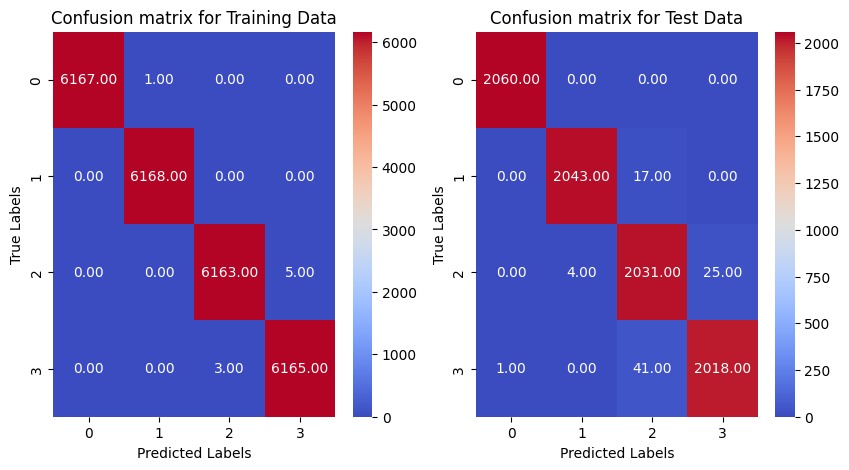

In [ ]:
# Ramdom Forest Classifier using Over_Sampled data
#PCA
P_C_A = PCA(n_components=6)
P_C_A.fit(X_Tr_Sampled)
X_Tr_Revised = P_C_A.transform(X_Tr_Sampled)
X_Te_Revised = P_C_A.transform(X_Te_Sampled)

#Random Forest implementation
#Initialising and fitting the Random Forest object
RF_obj= RandomForestClassifier(n_estimators=50,min_samples_leaf=3,random_state=0)
RF_obj.fit(X_Tr_Revised,y_Tr_Sampled)

response_predictor_Tr = RF_obj.predict(X_Tr_Revised)
response_predictor_Te = RF_obj.predict(X_Te_Revised)

#Cross validation Score to determine which knn model would perform better
cv_score= cross_val_score(RF_obj,X_Te_Revised,y_Te_Sampled, cv = 10 )
Mean_s = cv_score.mean()
std_s =cv_score.std()

#CV  Score
print(f"CV score: {Mean_s}")
print(f"CV score Standard deviation: {std_s}")
#Evaluating the model's performance

#Accuracy of the model
Acc= accuracy_score(y_Te_Sampled,response_predictor_Te)
print(f"      !!!!!!!!!!!!!! ACCURACY SCORE : {Acc}")


print("    ***************** Random Forest Classifier's Performance ***************** \n            -------------With Training data-------------\n",classification_report(y_Tr_Sampled,response_predictor_Tr))
Figure, axes= plt.subplots(ncols=2, figsize= (10,5))
c_m_1 = confusion_matrix(y_Tr_Sampled, response_predictor_Tr)
sns.heatmap(c_m_1, cmap='coolwarm',annot=True,fmt='.2f', ax= axes[0])
axes[0].set_title('Confusion matrix for Training Data')
axes[0].set_xlabel('Predicted Labels') 
axes[0].set_ylabel('True Labels')

print("    ***************** Random Forest Classifier's Performance ***************** \n            -------------With Test data-------------\n",classification_report(y_Te_Sampled,response_predictor_Te))
c_m_2 = confusion_matrix(y_Te_Sampled, response_predictor_Te)
sns.heatmap(c_m_2, cmap='coolwarm',annot=True,fmt='.2f',  ax= axes[1])
axes[1].set_title('Confusion matrix for Test Data')
axes[1].set_xlabel('Predicted Labels') 
axes[1].set_ylabel('True Labels')